# The NoteBook is created for the analysis of Customer 2 on WD brand and the competitor's SPC Brand

BUSINESS PROBLEM:
The company is one of the leading household cleaning supplies brand in US and sells products under the ‘WD Brand’. Another competitor in the same line of business is ‘SPC Brand’. The company has 3 major customers – Customer 1, Customer 2 and Customer 3 and the business requirement is to identify the pricing dynamics for ‘WD’ Brand of products.

Problem statement:

To identify the pricing dynamics for a leading household cleaning supplies brand. • What is Brand’s total U.S. price elasticity?

• Create a robust imputation logic where price data is missing.

• Is the price elasticity increasing or decreasing over time?

• Which customer segment are most price elastic?

• What is the impact of key competitor’s pricing on the target brand?

• Create price elasticity curves by key customer segments / time periods? (Elasticity may differ at different price points and we would like to change in elasticity.)

In [109]:
#Importing all the libraries for Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [110]:
#Importing the libraries for Linear Regression modelling
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
from sklearn.preprocessing import PowerTransformer
boxtrans = PowerTransformer(method='box-cox')
from sklearn.preprocessing import RobustScaler
robustscale=RobustScaler()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [111]:
#Importing the dataset into dataframe
cust2=pd.read_excel("C:\\Users\\IPBAM014\\Desktop\\Project_Dataset.xlsx", sheet_name="Customer2")

In [112]:
# Creating a copy
cust2ini=cust2.copy()

### Checking Raw data

In [113]:
cust2.head()

,EndDate,CustomerNumber,PartNumber,ProdRptCat,PRODSTYLE,UnitsSold,AmtSold
0,2015-03-06,44575,10152,811,WD012,5888,37870.4384
1,2015-03-06,44575,300004,835,SPC11,1920,13719.9360
2,2015-03-06,44575,300012,835,SPC11,1019,7107.3212
3,2015-03-06,44575,300035,835,SPC65,19,264.4097
4,2015-03-06,44575,300042,835,SP001,9,296.2494


In [114]:
cust2.tail()

,EndDate,CustomerNumber,PartNumber,ProdRptCat,PRODSTYLE,UnitsSold,AmtSold
604,2016-06-03,44575,300240,835,SPC10,1528,8528.2394
605,2016-06-03,44575,450054,811,WD008,47,257.7500
606,2016-06-03,44575,490026,811,WD008,10178,61193.3871
607,2016-06-03,44575,490057,811,WD012,6879,42428.4900
608,2016-06-03,44575,490194,850,WD017,1626,19366.4080


In [115]:
#Number of Rows and columns
cust2.shape

(609, 7)

In [116]:
#Getting Dtypes of each columns
cust2.dtypes 

EndDate           datetime64[ns]
CustomerNumber             int64
PartNumber                 int64
ProdRptCat                 int64
PRODSTYLE                 object
UnitsSold                  int64
AmtSold                  float64
dtype: object

In [117]:
#Additional info about dataframe
cust2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 7 columns):
EndDate           609 non-null datetime64[ns]
CustomerNumber    609 non-null int64
PartNumber        609 non-null int64
ProdRptCat        609 non-null int64
PRODSTYLE         609 non-null object
UnitsSold         609 non-null int64
AmtSold           609 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 33.4+ KB


In [118]:
# Listing down the columns in the Data Frame
cust2.columns 

Index(['EndDate', 'CustomerNumber', 'PartNumber', 'ProdRptCat', 'PRODSTYLE',
       'UnitsSold', 'AmtSold'],
      dtype='object')

In [119]:
#Get Statistical description for the Numeric columns
cust2.describe()

,CustomerNumber,PartNumber,ProdRptCat,UnitsSold,AmtSold
count,609.0,609.000000,609.000000,609.000000,609.000000
mean,44575.0,338883.889984,825.605911,2701.543514,16569.305005
std,0.0,142582.390763,13.299771,3131.640370,16561.938708
min,44575.0,10152.000000,811.000000,-1.000000,0.000000
25%,44575.0,300012.000000,811.000000,1014.000000,6849.446500
50%,44575.0,300240.000000,835.000000,1466.000000,9763.729100
75%,44575.0,490026.000000,835.000000,2517.000000,20034.462200
max,44575.0,490194.000000,850.000000,24049.000000,97179.953900


## Data Cleaning and Preparation

In [120]:
#Identifying the null values
cust2.isnull().sum()

EndDate           0
CustomerNumber    0
PartNumber        0
ProdRptCat        0
PRODSTYLE         0
UnitsSold         0
AmtSold           0
dtype: int64

### There are no null values we are not removing anything

### We will check if there are any negative values

In [121]:
cust2.describe()

,CustomerNumber,PartNumber,ProdRptCat,UnitsSold,AmtSold
count,609.0,609.000000,609.000000,609.000000,609.000000
mean,44575.0,338883.889984,825.605911,2701.543514,16569.305005
std,0.0,142582.390763,13.299771,3131.640370,16561.938708
min,44575.0,10152.000000,811.000000,-1.000000,0.000000
25%,44575.0,300012.000000,811.000000,1014.000000,6849.446500
50%,44575.0,300240.000000,835.000000,1466.000000,9763.729100
75%,44575.0,490026.000000,835.000000,2517.000000,20034.462200
max,44575.0,490194.000000,850.000000,24049.000000,97179.953900


#### There are some negative values in UnitSold and there are some zero values in AmtSold 

In [122]:
cust2[(cust2["UnitsSold"]<=0) | (cust2["AmtSold"]<=0)] 

,EndDate,CustomerNumber,PartNumber,ProdRptCat,PRODSTYLE,UnitsSold,AmtSold
23,2015-03-20,44575,300035,835,SPC65,-1,13.99
184,2015-07-31,44575,300042,835,SP001,-1,0.00
441,2016-02-12,44575,300042,835,SP001,2,0.00
530,2016-04-15,44575,300042,835,SP001,0,10.00


In [123]:
#Removing the above 4 rows
cust2.drop(cust2[(cust2['UnitsSold']<0) | (cust2['AmtSold']<=0)].index,inplace=True)

In [124]:
#Verify the above operation 
cust2[(cust2['UnitsSold']<0) | (cust2['AmtSold']<=0)]

,EndDate,CustomerNumber,PartNumber,ProdRptCat,PRODSTYLE,UnitsSold,AmtSold


#### -------------There are no negative values,missing values or Zero values-------------

## Creating new column for Unit Price

In [125]:
cust2['UnitPrice']=cust2['AmtSold']/cust2['UnitsSold']  #Adding AmtPerUnit column

In [126]:
cust2.head()

,EndDate,CustomerNumber,PartNumber,ProdRptCat,PRODSTYLE,UnitsSold,AmtSold,UnitPrice
0,2015-03-06,44575,10152,811,WD012,5888,37870.4384,6.4318
1,2015-03-06,44575,300004,835,SPC11,1920,13719.9360,7.1458
2,2015-03-06,44575,300012,835,SPC11,1019,7107.3212,6.9748
3,2015-03-06,44575,300035,835,SPC65,19,264.4097,13.9163
4,2015-03-06,44575,300042,835,SP001,9,296.2494,32.9166


In [127]:
#Changing the data type of End Date to date time
cust2['EndDate']=pd.to_datetime(cust2['EndDate'])

In [128]:
cust2.dtypes

EndDate           datetime64[ns]
CustomerNumber             int64
PartNumber                 int64
ProdRptCat                 int64
PRODSTYLE                 object
UnitsSold                  int64
AmtSold                  float64
UnitPrice                float64
dtype: object

### Seperating the Data on Brand level

In [129]:
cust2.columns

Index(['EndDate', 'CustomerNumber', 'PartNumber', 'ProdRptCat', 'PRODSTYLE',
       'UnitsSold', 'AmtSold', 'UnitPrice'],
      dtype='object')

In [130]:
##Dropping other columns apart from 'UnitsSold', 'AmtSold'
cust2.drop(['CustomerNumber','PartNumber','ProdRptCat','UnitPrice'],axis=1, inplace=True)
cust2_WD=cust2[cust2['PRODSTYLE'].str.match('WD')]
cust2_SPC=cust2[cust2['PRODSTYLE'].str.match('SPC')]
cust2_SP=cust2[cust2['PRODSTYLE'].str.match('SP0')]

In [131]:
#Adding unit price in the Data Frame
cust2_WD['UnitPrice']=cust2_WD['AmtSold']/cust2_WD['UnitsSold']
cust2_SPC['UnitPrice']=cust2_SPC['AmtSold']/cust2_SPC['UnitsSold']
cust2_SP['UnitPrice']=cust2_SP['AmtSold']/cust2_SP['UnitsSold']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [132]:
cust2_WD.head()

,EndDate,PRODSTYLE,UnitsSold,AmtSold,UnitPrice
0,2015-03-06,WD012,5888,37870.4384,6.4318
7,2015-03-06,WD008,9352,50996.4560,5.4530
8,2015-03-06,WD008,2083,11395.2598,5.4706
9,2015-03-06,WD012,1640,10614.9000,6.4725
10,2015-03-13,WD012,7172,46170.4672,6.4376


In [133]:
cust2_SPC.head()

,EndDate,PRODSTYLE,UnitsSold,AmtSold,UnitPrice
1,2015-03-06,SPC11,1920,13719.9360,7.1458
2,2015-03-06,SPC11,1019,7107.3212,6.9748
3,2015-03-06,SPC65,19,264.4097,13.9163
5,2015-03-06,SPC10,689,4803.5702,6.9718
6,2015-03-06,SPC10,1412,9849.4060,6.9755


In [134]:
cust2_SP.head()

,EndDate,PRODSTYLE,UnitsSold,AmtSold,UnitPrice
4,2015-03-06,SP001,9,296.2494,32.9166
14,2015-03-13,SP001,6,131.9598,21.9933
24,2015-03-20,SP001,3,42.9798,14.3266
50,2015-04-10,SP001,2,33.0000,16.5000
59,2015-04-17,SP001,3,48.9900,16.3300


## Dividing data set further on the basis of sub products

In [135]:
#Get the unique Subproducts of WD
cust2_WD['PRODSTYLE'].unique()

array(['WD012', 'WD008', 'WD017'], dtype=object)

In [136]:
#Get the unique Subproducts of SPC
cust2_SPC['PRODSTYLE'].unique()

array(['SPC11', 'SPC65', 'SPC10'], dtype=object)

#### ----Sub Products for WD----

In [137]:
cust2_WD012=cust2_WD[cust2_WD['PRODSTYLE']=='WD012']
cust2_WD012.columns=['EndDate','WD012','WD012UnitsSold','WD012AmtSold','WD012UnitPrice']
cust2_WD012.drop(['WD012'],axis=1,inplace=True)
cust2_WD012.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,EndDate,WD012UnitsSold,WD012AmtSold,WD012UnitPrice
0,2015-03-06,5888,37870.4384,6.4318
9,2015-03-06,1640,10614.9000,6.4725
10,2015-03-13,7172,46170.4672,6.4376
19,2015-03-13,1797,11541.4122,6.4226
20,2015-03-20,7534,48454.1676,6.4314


In [138]:
cust2_WD008=cust2_WD[cust2_WD['PRODSTYLE']=='WD008']
cust2_WD008.columns=['EndDate','WD008','WD008UnitsSold','WD008AmtSold','WD008UnitPrice']
cust2_WD008.drop(['WD008'],axis=1,inplace=True)
cust2_WD008.head()

,EndDate,WD008UnitsSold,WD008AmtSold,WD008UnitPrice
7,2015-03-06,9352,50996.4560,5.4530
8,2015-03-06,2083,11395.2598,5.4706
17,2015-03-13,10310,56403.9480,5.4708
18,2015-03-13,1926,10560.8358,5.4833
27,2015-03-20,9765,53505.3645,5.4793


In [139]:
cust2_WD017=cust2_WD[cust2_WD['PRODSTYLE']=='WD017']
cust2_WD017.columns=['EndDate','WD017','WD017UnitsSold','WD017AmtSold','WD017UnitPrice']
cust2_WD017.drop(['WD017'],axis=1,inplace=True)
cust2_WD017.head()

,EndDate,WD017UnitsSold,WD017AmtSold,WD017UnitPrice
223,2015-08-28,1,9.9900,9.990000
232,2015-09-04,587,5825.8500,9.924787
241,2015-09-11,957,9571.7397,10.001818
251,2015-09-18,1099,10925.2396,9.941073
260,2015-09-25,1265,12664.6698,10.011597


#### ----Sub Products for SPC----

In [140]:
cust2_SPC11=cust2_SPC[cust2_SPC['PRODSTYLE']=='SPC11']
cust2_SPC11.columns=['EndDate','SPC11','SPC11UnitsSold','SPC11AmtSold','SPC11UnitPrice']
cust2_SPC11.drop(['SPC11'],axis=1,inplace=True)
cust2_SPC11.head()

,EndDate,SPC11UnitsSold,SPC11AmtSold,SPC11UnitPrice
1,2015-03-06,1920,13719.9360,7.1458
2,2015-03-06,1019,7107.3212,6.9748
11,2015-03-13,3150,20300.1750,6.4445
12,2015-03-13,1645,10216.4370,6.2106
21,2015-03-20,3830,23628.8020,6.1694


In [141]:
cust2_SPC10=cust2_SPC[cust2_SPC['PRODSTYLE']=='SPC10']
cust2_SPC10.columns=['EndDate','SPC10','SPC10UnitsSold','SPC10AmtSold','SPC10UnitPrice']
cust2_SPC10.drop(['SPC10'],axis=1,inplace=True)
cust2_SPC10.head()

,EndDate,SPC10UnitsSold,SPC10AmtSold,SPC10UnitPrice
5,2015-03-06,689,4803.5702,6.9718
6,2015-03-06,1412,9849.4060,6.9755
15,2015-03-13,1071,6608.6055,6.1705
16,2015-03-13,2105,13266.1310,6.3022
25,2015-03-20,1265,7384.3110,5.8374


In [142]:
cust2_SPC65=cust2_SPC[cust2_SPC['PRODSTYLE']=='SPC65']
cust2_SPC65.columns=['EndDate','SPC65','SPC65UnitsSold','SPC65AmtSold','SPC65UnitPrice']
cust2_SPC65.drop(['SPC65'],axis=1,inplace=True)
cust2_SPC65.head()

,EndDate,SPC65UnitsSold,SPC65AmtSold,SPC65UnitPrice
3,2015-03-06,19,264.4097,13.9163
13,2015-03-13,3,41.9700,13.9900
33,2015-03-27,1,2.0000,2.0000
167,2015-07-17,1,13.9900,13.9900
264,2015-10-02,1,13.9900,13.9900


### Exploratory Data Analysis

In [143]:
cust2ini.corr()



,CustomerNumber,PartNumber,ProdRptCat,UnitsSold,AmtSold
CustomerNumber,NaN,NaN,NaN,NaN,NaN
PartNumber,NaN,1.000000,-0.035729,-0.051421,-0.079808
ProdRptCat,NaN,-0.035729,1.000000,-0.515376,-0.479884
UnitsSold,NaN,-0.051421,-0.515376,1.000000,0.976262
AmtSold,NaN,-0.079808,-0.479884,0.976262,1.000000


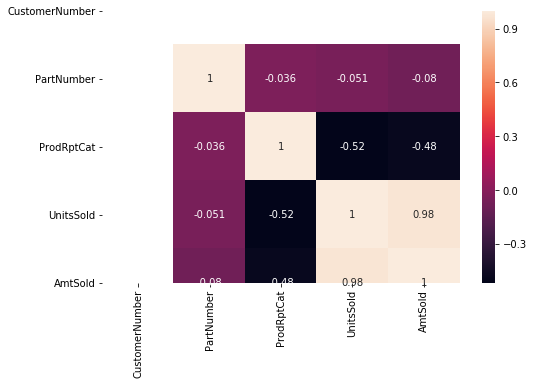

In [144]:
figure=plt.figure(figsize=(8,5))
sns.heatmap(cust2ini.corr(),annot=True)

Text(0, 0.5, 'Unit Price')

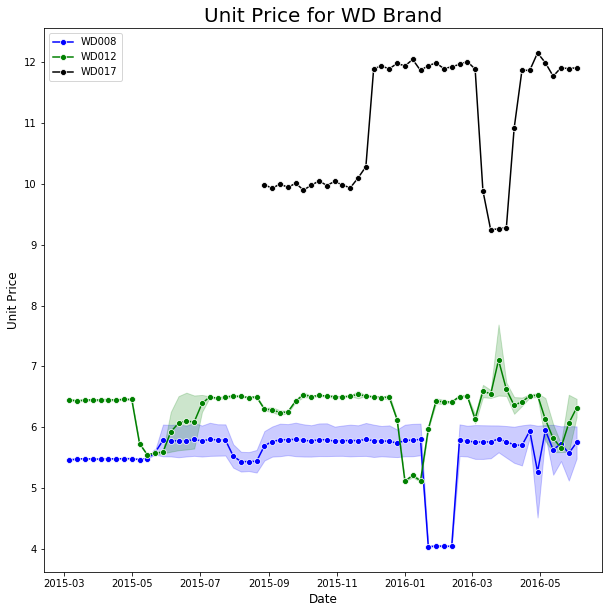

In [145]:
fig,ax=plt.subplots(figsize=(10,10))
x1=cust2_WD008['EndDate']
y1=cust2_WD008['WD008UnitPrice']
x2=cust2_WD012['EndDate']
y2=cust2_WD012['WD012UnitPrice']
x3=cust2_WD017['EndDate']
y3=cust2_WD017['WD017UnitPrice']
plt.title('Unit Price for WD Brand',fontsize=20)
ax=sns.lineplot(x1,y1,ax=ax,color='blue',marker='o',label='WD008')
ax=sns.lineplot(x2,y2,ax=ax,color='green',marker='o',label='WD012')
ax=sns.lineplot(x3,y3,ax=ax,color='black',marker='o',label='WD017')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Unit Price',fontsize=12)

Text(0, 0.5, 'Units Sold ')

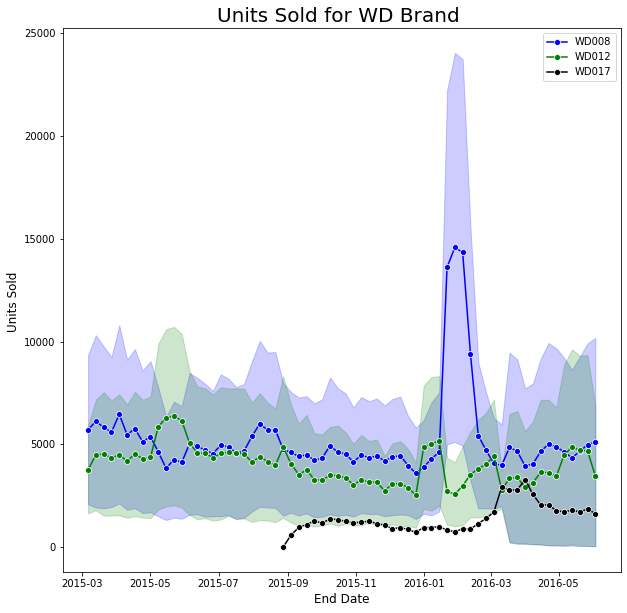

In [146]:
fig,ax=plt.subplots(figsize=(10,10))

x1=cust2_WD008['EndDate']
y1=cust2_WD008['WD008UnitsSold']
x2=cust2_WD012['EndDate']
y2=cust2_WD012['WD012UnitsSold']
x3=cust2_WD017['EndDate']
y3=cust2_WD017['WD017UnitsSold']
plt.title('Units Sold for WD Brand ',fontsize=20)
ax=sns.lineplot(x1,y1,ax=ax,color='blue',marker='o',label='WD008')
ax=sns.lineplot(x2,y2,ax=ax,color='green',marker='o',label='WD012')
ax=sns.lineplot(x3,y3,ax=ax,color='black',marker='o',label='WD017')
plt.xlabel('End Date',fontsize=12)
plt.ylabel('Units Sold ',fontsize=12)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D65F96CFC8>,
      dtype=object)

<Figure size 7200x7200 with 0 Axes>

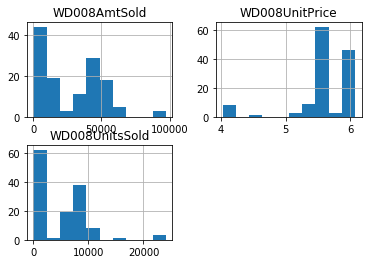

In [147]:
fig=plt.figure(figsize=(100,100))
cust2_WD008.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D6595BBBC8>,
      dtype=object)

<Figure size 7200x7200 with 0 Axes>

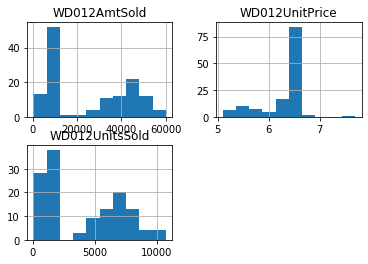

In [148]:
fig=plt.figure(figsize=(100,100))
cust2_WD012.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D66BF3CE88>,
      dtype=object)

<Figure size 7200x7200 with 0 Axes>

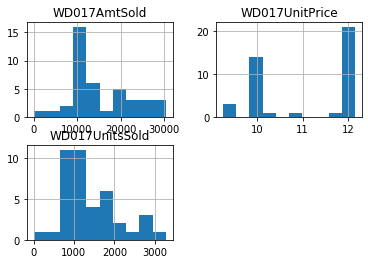

In [149]:
fig=plt.figure(figsize=(100,100))
cust2_WD017.hist()

Text(0.5, 1.0, 'WD008 Unit Price Box Plot')

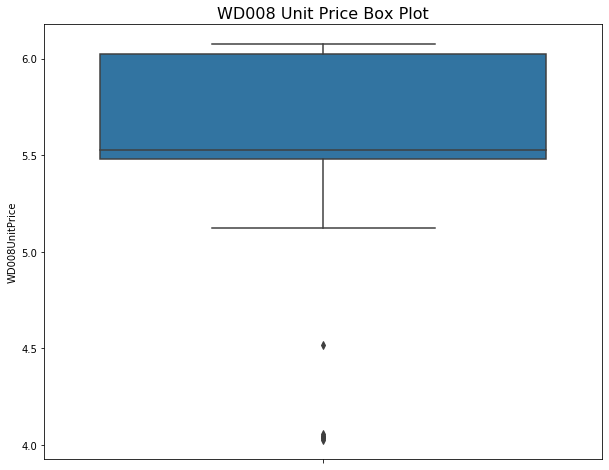

In [150]:
fig=plt.figure(figsize=(10,8))
ax=sns.boxplot(y=cust2_WD008['WD008UnitPrice'])
plt.title('WD008 Unit Price Box Plot',fontsize=16)

Text(0.5, 1.0, 'WD008 Units Sold Box Plot')

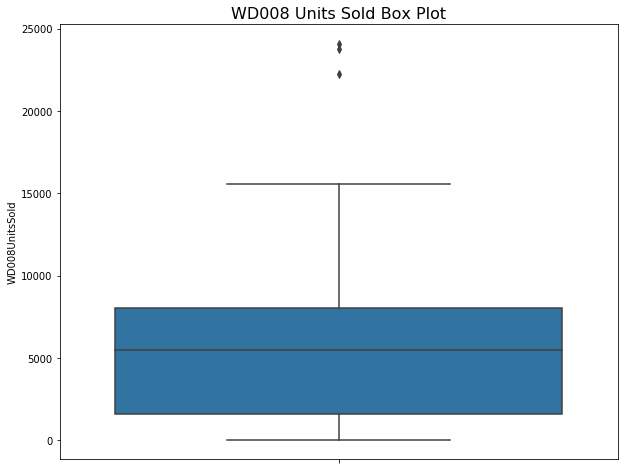

In [151]:
fig=plt.figure(figsize=(10,8))
ax=sns.boxplot(y=cust2_WD008['WD008UnitsSold'])
plt.title('WD008 Units Sold Box Plot',fontsize=16)

Text(0.5, 1.0, 'WD012 Unit Price Box Plot')

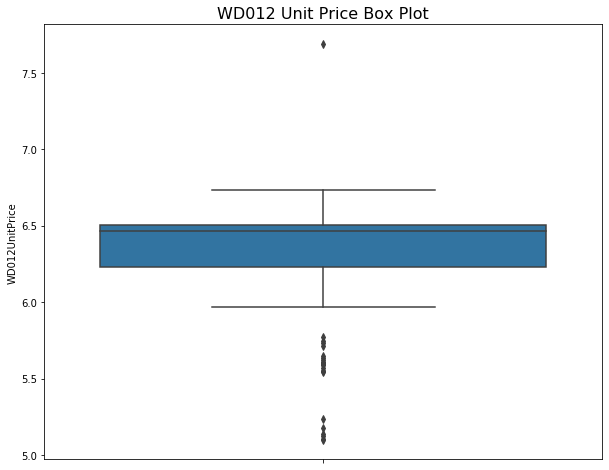

In [152]:
fig=plt.figure(figsize=(10,8))
ax=sns.boxplot(y=cust2_WD012['WD012UnitPrice'])
plt.title('WD012 Unit Price Box Plot',fontsize=16)

Text(0.5, 1.0, 'WD012 Units Sold Box Plot')

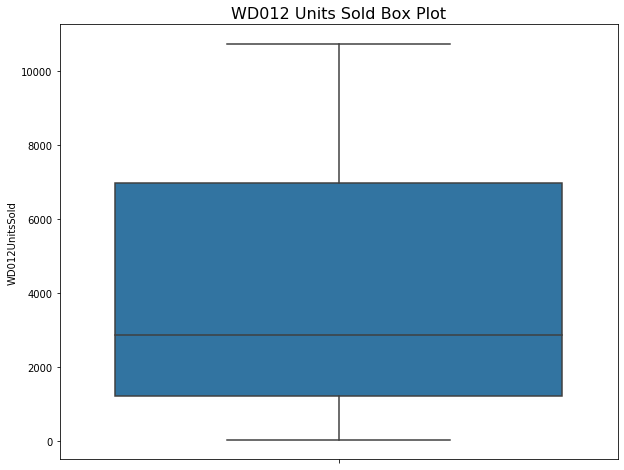

In [153]:
fig=plt.figure(figsize=(10,8))
ax=sns.boxplot(y=cust2_WD012['WD012UnitsSold'])
plt.title('WD012 Units Sold Box Plot',fontsize=16)

Text(0.5, 1.0, 'WD017 Unit Price Box Plot')

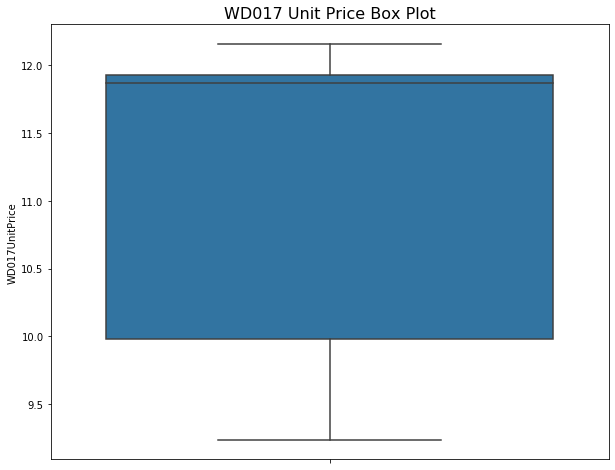

In [154]:
fig=plt.figure(figsize=(10,8))
ax=sns.boxplot(y=cust2_WD017['WD017UnitPrice'])
plt.title('WD017 Unit Price Box Plot',fontsize=16)

Text(0.5, 1.0, 'WD017 Units Sold Box Plot')

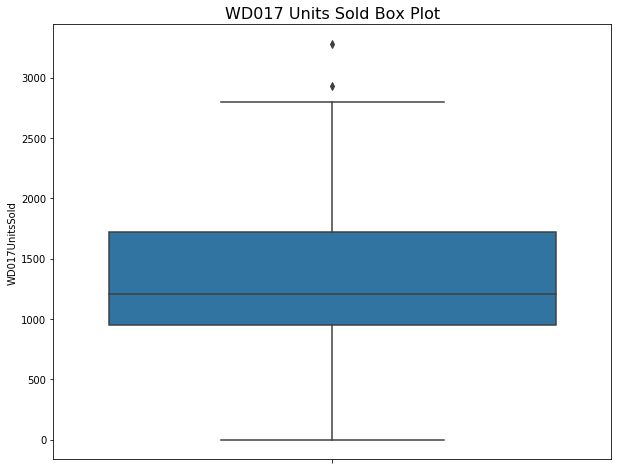

In [155]:
fig=plt.figure(figsize=(10,8))
ax=sns.boxplot(y=cust2_WD017['WD017UnitsSold'])
plt.title('WD017 Units Sold Box Plot',fontsize=16)

## Using scatter plot to visualize the relattionship between Unit Price and Unit Sold

Text(0, 0.5, 'UnitsSold')

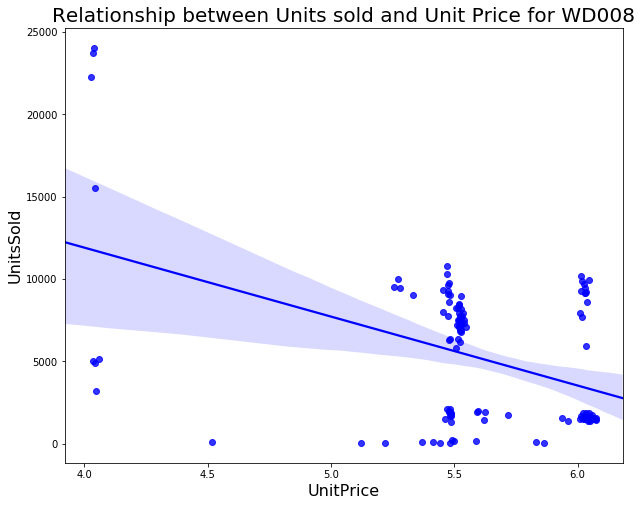

In [156]:
fig=plt.figure(figsize=(10,8))
x=cust2_WD008['WD008UnitPrice']
y=cust2_WD008['WD008UnitsSold']
sns.regplot(x,y, color = 'blue')
plt.title('Relationship between Units sold and Unit Price for WD008',fontsize=20)
plt.xlabel('UnitPrice',fontsize=16)
plt.ylabel('UnitsSold',fontsize=16)

Text(0, 0.5, 'UnitsSold')

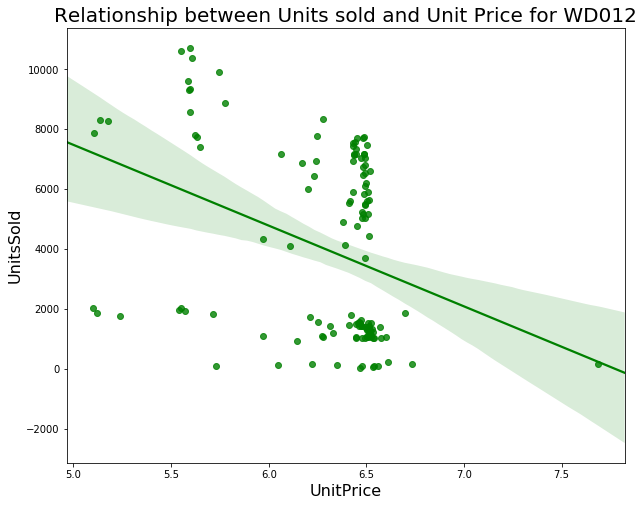

In [157]:
fig=plt.figure(figsize=(10,8))
x=cust2_WD012['WD012UnitPrice']
y=cust2_WD012['WD012UnitsSold']
sns.regplot(x,y, color = 'green')
plt.title('Relationship between Units sold and Unit Price for WD012',fontsize=20)
plt.xlabel('UnitPrice',fontsize=16)
plt.ylabel('UnitsSold',fontsize=16)

Text(0, 0.5, 'UnitsSold')

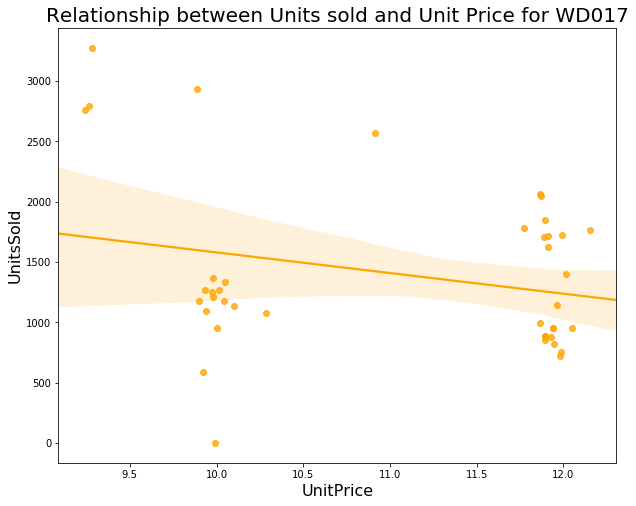

In [158]:
fig=plt.figure(figsize=(10,8))
x=cust2_WD017['WD017UnitPrice']
y=cust2_WD017['WD017UnitsSold']
sns.regplot(x,y, color = 'orange')
plt.title('Relationship between Units sold and Unit Price for WD017',fontsize=20)
plt.xlabel('UnitPrice',fontsize=16)
plt.ylabel('UnitsSold',fontsize=16)

#### WD008

In [159]:
customer2_WD_brand_008_Q1=cust2_WD008.WD008UnitPrice.quantile(0.25)
print("Quantile 1:",customer2_WD_brand_008_Q1)

customer2_WD_brand_008_Q3=cust2_WD008.WD008UnitPrice.quantile(0.75)
print("Quantile 3:",customer2_WD_brand_008_Q3)

customer2_WD_brand_008_IQR=customer2_WD_brand_008_Q3-customer2_WD_brand_008_Q1
print("IQR",customer2_WD_brand_008_IQR)

Quantile 1: 5.480499999999999
Quantile 3: 6.025714852400508
IQR 0.5452148524005089


In [160]:
upperrange=customer2_WD_brand_008_Q3+(customer2_WD_brand_008_IQR*1.5)
print("Upper Range:",upperrange)
lowerrange=customer2_WD_brand_008_Q1-(customer2_WD_brand_008_IQR*1.5)
print("Lower Range:",lowerrange)

Upper Range: 6.843537131001272
Lower Range: 4.662677721399236


In [161]:
df_WD008=cust2_WD008[(cust2_WD008.WD008UnitPrice <= 6.843537131001272) & (cust2_WD008.WD008UnitPrice >= 4.662677721399236)]

#### WD012

In [162]:
customer2_WD_brand_012_Q1=cust2_WD012.WD012UnitPrice.quantile(0.25)
print("Quantile 1:",customer2_WD_brand_012_Q1)

customer2_WD_brand_012_Q3=cust2_WD012.WD012UnitPrice.quantile(0.75)
print("Quantile 3:",customer2_WD_brand_012_Q3)

customer2_WD_brand_012_IQR=customer2_WD_brand_012_Q3-customer2_WD_brand_012_Q1
print("IQR",customer2_WD_brand_012_IQR)

Quantile 1: 6.227810128388164
Quantile 3: 6.504261207994322
IQR 0.2764510796061579


In [163]:
upperrange=customer2_WD_brand_012_Q3+(customer2_WD_brand_012_IQR*1.5)
print("Upper Range:",upperrange)
lowerrange=customer2_WD_brand_012_Q1-(customer2_WD_brand_012_IQR*1.5)
print("Lower Range:",lowerrange)

Upper Range: 6.918937827403559
Lower Range: 5.813133508978927


In [164]:
df_WD012=cust2_WD012[(cust2_WD012.WD012UnitPrice <= 6.918937827403559) & (cust2_WD012.WD012UnitPrice >= 5.813133508978927)]

#### WD017

In [165]:
customer2_WD_brand_017_Q1=cust2_WD017.WD017UnitPrice.quantile(0.25)
print("Quantile 1:",customer2_WD_brand_017_Q1)

customer2_WD_brand_017_Q3=cust2_WD017.WD017UnitPrice.quantile(0.75)
print("Quantile 3:",customer2_WD_brand_017_Q3)

customer2_WD_brand_017_IQR=customer2_WD_brand_017_Q3-customer2_WD_brand_017_Q1
print("IQR",customer2_WD_brand_017_IQR)

Quantile 1: 9.981378943022296
Quantile 3: 11.925963169897377
IQR 1.9445842268750813


In [166]:
upperrange=customer2_WD_brand_017_Q3+(customer2_WD_brand_017_IQR*1.5)
print("Upper Range:",upperrange)
lowerrange=customer2_WD_brand_017_Q1-(customer2_WD_brand_017_IQR*1.5)
print("Lower Range:",lowerrange)

Upper Range: 14.842839510209998
Lower Range: 7.064502602709674


In [167]:
df_WD017=cust2_WD017[(cust2_WD017.WD017UnitPrice <= 14.842839510209998) & (cust2_WD017.WD017UnitPrice >= 7.064502602709674)]

#### SPC11

In [168]:
customer2_SPC_brand_11_Q1=cust2_SPC11.SPC11UnitPrice.quantile(0.25)
print("Quantile 1:",customer2_SPC_brand_11_Q1)

customer2_SPC_brand_11_Q3=cust2_SPC11.SPC11UnitPrice.quantile(0.75)
print("Quantile 3:",customer2_SPC_brand_11_Q3)

customer2_SPC_brand_11_IQR=customer2_SPC_brand_11_Q3-customer2_SPC_brand_11_Q1
print("IQR",customer2_SPC_brand_11_IQR)

Quantile 1: 6.289813998430418
Quantile 3: 7.348135182490255
IQR 1.058321184059837


In [169]:
upperrange=customer2_SPC_brand_11_Q3+(customer2_SPC_brand_11_IQR*1.5)
print("Upper Range:",upperrange)
lowerrange=customer2_SPC_brand_11_Q1-(customer2_SPC_brand_11_IQR*1.5)
print("Lower Range:",lowerrange)

Upper Range: 8.93561695858001
Lower Range: 4.7023322223406625


In [170]:
df_SPC11=cust2_SPC11[(cust2_SPC11.SPC11UnitPrice <= 8.93561695858001) & (cust2_SPC11.SPC11UnitPrice >= 4.7023322223406625)]

#### SPC65

In [171]:
customer2_SPC_brand_65_Q1=cust2_SPC65.SPC65UnitPrice.quantile(0.25)
print("Quantile 1:",customer2_SPC_brand_65_Q1)

customer2_SPC_brand_65_Q3=cust2_SPC65.SPC65UnitPrice.quantile(0.75)
print("Quantile 3:",customer2_SPC_brand_65_Q3)

customer2_SPC_brand_65_IQR=customer2_SPC_brand_65_Q3-customer2_SPC_brand_65_Q1
print("IQR",customer2_SPC_brand_65_IQR)

Quantile 1: 5.7425
Quantile 3: 13.99
IQR 8.2475


In [172]:
upperrange=customer2_SPC_brand_65_Q3+(customer2_SPC_brand_65_IQR*1.5)
print("Upper Range:",upperrange)
lowerrange=customer2_SPC_brand_65_Q1-(customer2_SPC_brand_65_IQR*1.5)
print("Lower Range:",lowerrange)

Upper Range: 26.36125
Lower Range: -6.62875


In [173]:
df_SPC65=cust2_SPC65[(cust2_SPC65.SPC65UnitPrice <= 26.36125) & (cust2_SPC65.SPC65UnitPrice >= 0)]

#### SPC10

In [174]:
customer2_SPC_brand_10_Q1=cust2_SPC10.SPC10UnitPrice.quantile(0.25)
print("Quantile 1:",customer2_SPC_brand_10_Q1)

customer2_SPC_brand_10_Q3=cust2_SPC10.SPC10UnitPrice.quantile(0.75)
print("Quantile 3:",customer2_SPC_brand_10_Q3)

customer2_SPC_brand_10_IQR=customer2_SPC_brand_10_Q3-customer2_SPC_brand_10_Q1
print("IQR",customer2_SPC_brand_10_IQR)

Quantile 1: 6.746529832303867
Quantile 3: 7.019632445838811
IQR 0.2731026135349435


In [175]:
upperrange=customer2_SPC_brand_10_Q3+(customer2_SPC_brand_10_IQR*1.5)
print("Upper Range:",upperrange)
lowerrange=customer2_SPC_brand_10_Q1-(customer2_SPC_brand_10_IQR*1.5)
print("Lower Range:",lowerrange)

Upper Range: 7.429286366141226
Lower Range: 6.336875912001452


In [176]:
df_SPC10=cust2_SPC10[(cust2_SPC10.SPC10UnitPrice <= 7.429286366141226) & (cust2_SPC10.SPC10UnitPrice >= 6.336875912001452)]

## Aggregating Data at weekly level

In [177]:
## WD008

In [178]:
df_WD008.head()

,EndDate,WD008UnitsSold,WD008AmtSold,WD008UnitPrice
7,2015-03-06,9352,50996.4560,5.4530
8,2015-03-06,2083,11395.2598,5.4706
17,2015-03-13,10310,56403.9480,5.4708
18,2015-03-13,1926,10560.8358,5.4833
27,2015-03-20,9765,53505.3645,5.4793


In [179]:
df_WD008_agg = df_WD008.groupby("EndDate",as_index=True)[['WD008UnitsSold','WD008AmtSold']].agg({'WD008UnitsSold':np.sum,'WD008AmtSold':np.sum})

In [180]:
df_WD008_agg.head()

,WD008UnitsSold,WD008AmtSold
EndDate,,
2015-03-06,11435,62391.7158
2015-03-13,12236,66964.7838
2015-03-20,11654,63866.5295
2015-03-27,11195,61280.5007
2015-04-03,12925,70740.0076


In [181]:
df_WD008_agg['WD008UnitPrice']=df_WD008_agg['WD008AmtSold']/df_WD008_agg['WD008UnitsSold']

In [182]:
## WD012

In [183]:
df_WD012_agg = df_WD012.groupby("EndDate",as_index=True)[['WD012UnitsSold','WD012AmtSold']].agg({'WD012UnitsSold':np.sum,'WD012AmtSold':np.sum})

In [184]:
df_WD012_agg.head()

,WD012UnitsSold,WD012AmtSold
EndDate,,
2015-03-06,7528,48485.3384
2015-03-13,8969,57711.8794
2015-03-20,9066,58359.4668
2015-03-27,8678,55888.2226
2015-04-03,8982,57800.9754


In [185]:
df_WD012_agg['WD012UnitPrice']=df_WD012_agg['WD012AmtSold']/df_WD012_agg['WD012UnitsSold']

In [186]:
## WD017

In [187]:
df_WD017_agg = df_WD017.groupby("EndDate",as_index=True)[['WD017UnitsSold','WD017AmtSold']].agg({'WD017UnitsSold':np.sum,'WD017AmtSold':np.sum})

In [188]:
df_WD017_agg.head()

,WD017UnitsSold,WD017AmtSold
EndDate,,
2015-08-28,1,9.9900
2015-09-04,587,5825.8500
2015-09-11,957,9571.7397
2015-09-18,1099,10925.2396
2015-09-25,1265,12664.6698


In [189]:
df_WD017_agg['WD017UnitPrice']=df_WD017_agg['WD017AmtSold']/df_WD017_agg['WD017UnitsSold']

#### --=-=-=-=-=-=-=-=-=-=-=-=-==-=-==-=-=--=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--=--=-=-=

In [190]:
df_SPC10_agg = df_SPC10.groupby("EndDate",as_index=True)[['SPC10UnitsSold','SPC10AmtSold']].agg({'SPC10UnitsSold':np.sum,'SPC10AmtSold':np.sum})

In [191]:
df_SPC10_agg.head()

,SPC10UnitsSold,SPC10AmtSold
EndDate,,
2015-03-06,2101,14652.9762
2015-04-10,2402,15879.7851
2015-04-17,2159,15022.0356
2015-04-24,1911,13301.0779
2015-05-01,2035,14164.2437


In [192]:
df_SPC10_agg['SPC10UnitPrice']=df_SPC10_agg['SPC10AmtSold']/df_SPC10_agg['SPC10UnitsSold']

In [193]:
df_SPC10_agg.corr()

,SPC10UnitsSold,SPC10AmtSold,SPC10UnitPrice
SPC10UnitsSold,1.000000,0.998921,0.038344
SPC10AmtSold,0.998921,1.000000,0.084236
SPC10UnitPrice,0.038344,0.084236,1.000000


In [194]:
df_SPC65.head()

,EndDate,SPC65UnitsSold,SPC65AmtSold,SPC65UnitPrice
3,2015-03-06,19,264.4097,13.9163
13,2015-03-13,3,41.9700,13.9900
33,2015-03-27,1,2.0000,2.0000
167,2015-07-17,1,13.9900,13.9900
264,2015-10-02,1,13.9900,13.9900


In [195]:
df_SPC65_agg = df_SPC65.groupby("EndDate",as_index=True)[['SPC65UnitsSold','SPC65AmtSold']].agg({'SPC65UnitsSold':np.sum,'SPC65AmtSold':np.sum})

In [196]:
df_SPC65_agg.head()

,SPC65UnitsSold,SPC65AmtSold
EndDate,,
2015-03-06,19,264.4097
2015-03-13,3,41.9700
2015-03-27,1,2.0000
2015-07-17,1,13.9900
2015-10-02,1,13.9900


In [197]:
df_SPC65_agg['SPC65UnitPrice']=df_SPC65_agg['SPC65AmtSold']/df_SPC65_agg['SPC65UnitsSold']

In [198]:
df_SPC65_agg.corr()

,SPC65UnitsSold,SPC65AmtSold,SPC65UnitPrice
SPC65UnitsSold,1.000000,0.998114,0.309598
SPC65AmtSold,0.998114,1.000000,0.367376
SPC65UnitPrice,0.309598,0.367376,1.000000


In [199]:
df_SPC11_agg = df_SPC11.groupby("EndDate",as_index=True)[['SPC11UnitsSold','SPC11AmtSold']].agg({'SPC11UnitsSold':np.sum,'SPC11AmtSold':np.sum})

In [200]:
df_SPC11_agg.head()

,SPC11UnitsSold,SPC11AmtSold
EndDate,,
2015-03-06,2939,20827.2572
2015-03-13,4795,30516.6120
2015-03-20,5687,34686.1228
2015-03-27,5155,31304.5711
2015-04-03,5543,33593.6884


In [201]:
df_SPC11_agg['SPC11UnitPrice']=df_SPC11_agg['SPC11AmtSold']/df_SPC11_agg['SPC11UnitsSold']

In [202]:
df_SPC11_agg.corr()

,SPC11UnitsSold,SPC11AmtSold,SPC11UnitPrice
SPC11UnitsSold,1.000000,0.909215,-0.655430
SPC11AmtSold,0.909215,1.000000,-0.293905
SPC11UnitPrice,-0.655430,-0.293905,1.000000


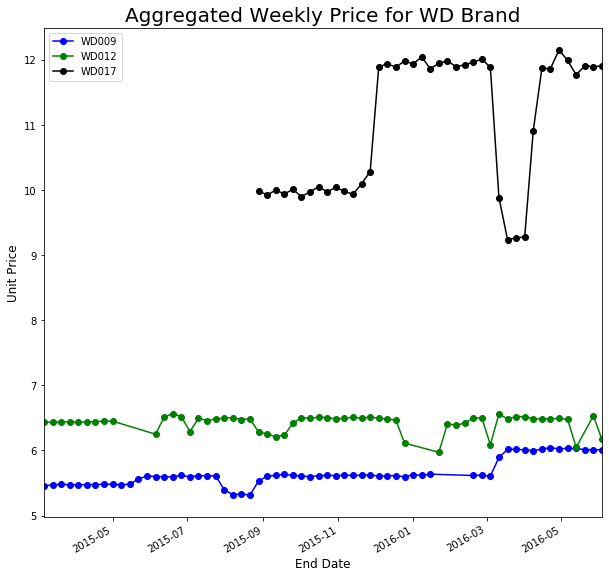

In [203]:
fig,ax=plt.subplots(figsize=(10,10))
df_WD008_agg['WD008UnitPrice'].plot(color='blue',marker='o',label='WD009')
ax.legend()
df_WD012_agg['WD012UnitPrice'].plot(color='green',marker='o',label='WD012')
ax.legend()
df_WD017_agg['WD017UnitPrice'].plot(color='black',marker='o',label='WD017')
ax.legend()
plt.xlabel('End Date',fontsize=12)
plt.ylabel('Unit Price',fontsize=12)
plt.title("Aggregated Weekly Price for WD Brand",fontsize=20)
plt.show()

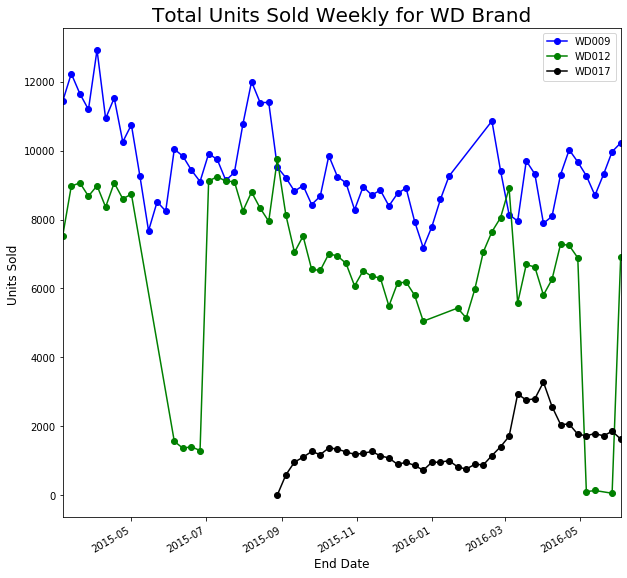

In [204]:
fig,ax=plt.subplots(figsize=(10,10))
df_WD008_agg['WD008UnitsSold'].plot(color='blue',marker='o',label='WD009')
ax.legend()
df_WD012_agg['WD012UnitsSold'].plot(color='green',marker='o',label='WD012')
ax.legend()
df_WD017_agg['WD017UnitsSold'].plot(color='black',marker='o',label='WD017')
ax.legend()
plt.xlabel('End Date',fontsize=12)
plt.ylabel('Units Sold ',fontsize=12)
plt.title("Total Units Sold Weekly for WD Brand",fontsize=20)
plt.show()

## Calculating point elasticity for WD

In [205]:
df_WD008_agg.shape

(62, 3)

In [206]:
lst = [0]
for i in range(1,62):
    numerator = (df_WD008_agg.WD008UnitsSold[i]-df_WD008_agg.WD008UnitsSold[i-1])/df_WD008_agg.WD008UnitsSold[i-1]
    denominator = (df_WD008_agg.WD008UnitPrice[i]-df_WD008_agg.WD008UnitPrice[i-1])/df_WD008_agg.WD008UnitPrice[i-1]
    
    lst.append(numerator/denominator)


In [207]:
PED_WD008 = df_WD008_agg.iloc[:,[0,1]].copy()
PED_WD008['WD008_PED'] = lst
PED_WD008.head()

,WD008UnitsSold,WD008AmtSold,WD008_PED
EndDate,,,
2015-03-06,11435,62391.7158,0.000000
2015-03-13,12236,66964.7838,23.077377
2015-03-20,11654,63866.5295,-34.911111
2015-03-27,11195,61280.5007,34.223019
2015-04-03,12925,70740.0076,-1054.370566


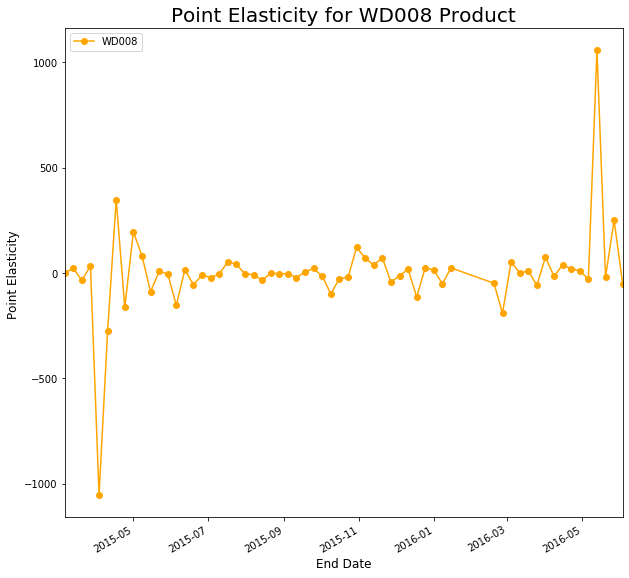

In [208]:
fig,ax=plt.subplots(figsize=(10,10))
PED_WD008['WD008_PED'].plot(color='orange',marker='o',label='WD008')
ax.legend()
plt.xlabel('End Date',fontsize=12)
plt.ylabel('Point Elasticity ',fontsize=12)
plt.title("Point Elasticity for WD008 Product",fontsize=20)
plt.show()

In [209]:
df_WD012_agg.shape

(58, 3)

In [210]:
lst = [0]
for i in range(1,58):
    numerator = (df_WD012_agg.WD012UnitsSold[i]-df_WD012_agg.WD012UnitsSold[i-1])/df_WD012_agg.WD012UnitsSold[i-1]
    denominator = (df_WD012_agg.WD012UnitPrice[i]-df_WD012_agg.WD012UnitPrice[i-1])/df_WD012_agg.WD012UnitPrice[i-1]
    
    lst.append(numerator/denominator)

In [211]:
PED_WD012 = df_WD012_agg.iloc[:,[0,1]].copy()
PED_WD012['WD012_PED'] = lst
PED_WD012.head()

,WD012UnitsSold,WD012AmtSold,WD012_PED
EndDate,,,
2015-03-06,7528,48485.3384,0.000000
2015-03-13,8969,57711.8794,-203.041421
2015-03-20,9066,58359.4668,26.925295
2015-03-27,8678,55888.2226,-90.622170
2015-04-03,8982,57800.9754,-44.957586


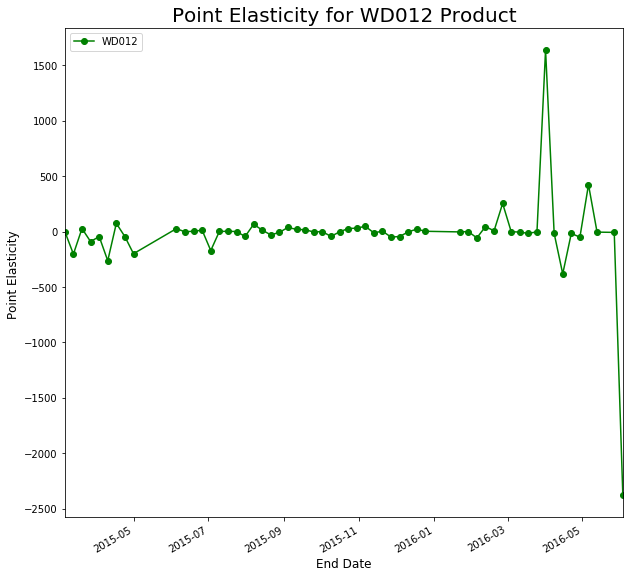

In [212]:
fig,ax=plt.subplots(figsize=(10,10))
PED_WD012['WD012_PED'].plot(color='green',marker='o',label='WD012')
ax.legend()
plt.xlabel('End Date',fontsize=12)
plt.ylabel('Point Elasticity ',fontsize=12)
plt.title("Point Elasticity for WD012 Product",fontsize=20)
plt.show()

In [213]:
df_WD017_agg.shape

(41, 3)

In [214]:
lst = [0]
for i in range(1,41):
    numerator = (df_WD017_agg.WD017UnitsSold[i]-df_WD017_agg.WD017UnitsSold[i-1])/df_WD017_agg.WD017UnitsSold[i-1]
    denominator = (df_WD017_agg.WD017UnitPrice[i]-df_WD017_agg.WD017UnitPrice[i-1])/df_WD017_agg.WD017UnitPrice[i-1]
    
    lst.append(numerator/denominator)

In [215]:
PED_WD017 = df_WD017_agg.iloc[:,[0,1]].copy()
PED_WD017['WD017_PED'] = lst
PED_WD017.head()

,WD017UnitsSold,WD017AmtSold,WD017_PED
EndDate,,,
2015-08-28,1,9.9900,0.000000
2015-09-04,587,5825.8500,-89769.597179
2015-09-11,957,9571.7397,81.212022
2015-09-18,1099,10925.2396,-24.431390
2015-09-25,1265,12664.6698,21.291723


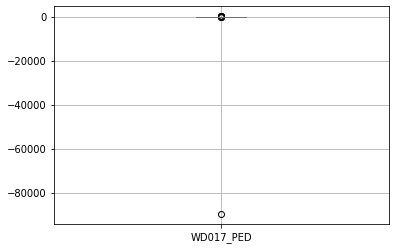

In [216]:
PED_WD017.boxplot('WD017_PED')

In [217]:
PED_WD017_temp=PED_WD017[PED_WD017['WD017_PED']>-10000]

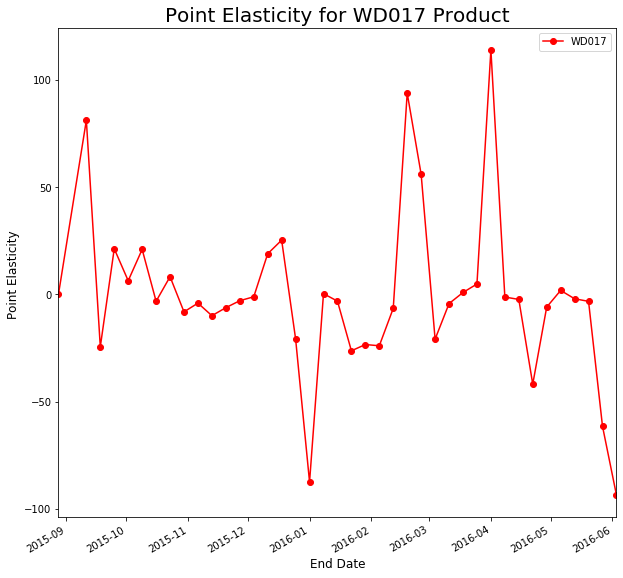

In [218]:
fig,ax=plt.subplots(figsize=(10,10))
PED_WD017_temp['WD017_PED'].plot(color='red',marker='o',label='WD017')
ax.legend()
plt.xlabel('End Date',fontsize=12)
plt.ylabel('Point Elasticity ',fontsize=12)
plt.title("Point Elasticity for WD017 Product",fontsize=20)
plt.show()

### Point Elasticity Median value for WD008 is -2.61

In [219]:
PED_WD008['WD008_PED'].median()

-3.0450035579486903

### Point Elasticity Median value for WD012 is -1.90

In [220]:
PED_WD012['WD012_PED'].median()

-2.5000467130342563

### Point Elasticity Median value for WD012 is -3.13

In [221]:
PED_WD017['WD017_PED'].median()

-3.1271095464978726

# ---Cross Elasticity---

## WD8_SPC10_11_65¶
#### Impact of competitior pricing on WD008


In [222]:
WD8_SPC10=pd.merge(df_WD008_agg, df_SPC10_agg, on='EndDate',how='outer')
WD8_SPC10_11=pd.merge(WD8_SPC10, df_SPC11_agg, on='EndDate',how='outer')
WD8_SPC10_11_65=pd.merge(WD8_SPC10_11, df_SPC65_agg, on='EndDate',how='outer')
WD8_SPC10_11_65.describe()

,WD008UnitsSold,WD008AmtSold,WD008UnitPrice,SPC10UnitsSold,SPC10AmtSold,SPC10UnitPrice,SPC11UnitsSold,SPC11AmtSold,SPC11UnitPrice,SPC65UnitsSold,SPC65AmtSold,SPC65UnitPrice
count,62.000000,62.000000,62.000000,52.000000,52.000000,52.000000,66.000000,66.000000,66.000000,8.000000,8.000000,8.000000
mean,9517.258065,53697.887476,5.651807,1884.230769,13165.341779,6.986430,3172.136364,21146.345712,6.781537,3.500000,44.792462,9.983287
std,1233.738035,6375.661083,0.201896,490.054924,3419.501300,0.070330,851.642520,4176.387192,0.665074,6.301927,89.653359,5.770314
min,7181.000000,40176.637100,5.316111,562.000000,3916.910000,6.611068,2314.000000,14407.489600,5.096646,1.000000,1.000000,1.000000
25%,8704.000000,48958.500025,5.538272,1871.500000,13103.663825,6.973499,2714.000000,18433.504225,6.300418,1.000000,5.742500,5.742500
50%,9288.500000,52607.650200,5.612233,2017.000000,14085.549650,7.000693,2878.500000,20515.604500,7.203105,1.000000,13.990000,13.953150
75%,10038.500000,58344.548350,5.628204,2133.750000,15024.608975,7.016355,3134.750000,22143.451900,7.244134,1.500000,20.985000,13.990000
max,12925.000000,70740.007600,6.043876,2575.000000,18056.469500,7.116177,5687.000000,34686.122800,7.301190,19.000000,264.409700,13.990000


In [223]:
WD8_SPC10_11_65.isnull().sum()

WD008UnitsSold     4
WD008AmtSold       4
WD008UnitPrice     4
SPC10UnitsSold    14
SPC10AmtSold      14
SPC10UnitPrice    14
SPC11UnitsSold     0
SPC11AmtSold       0
SPC11UnitPrice     0
SPC65UnitsSold    58
SPC65AmtSold      58
SPC65UnitPrice    58
dtype: int64

In [224]:
WD8_SPC10_11_65.corr()

,WD008UnitsSold,WD008AmtSold,WD008UnitPrice,SPC10UnitsSold,SPC10AmtSold,SPC10UnitPrice,SPC11UnitsSold,SPC11AmtSold,SPC11UnitPrice,SPC65UnitsSold,SPC65AmtSold,SPC65UnitPrice
WD008UnitsSold,1.000000,0.959130,-0.374647,0.351235,0.339886,-0.220576,0.386766,0.475791,-0.027464,0.431574,0.422634,0.001824
WD008AmtSold,0.959130,1.000000,-0.098428,0.404702,0.394262,-0.200583,0.448872,0.496023,-0.119250,0.401535,0.392665,-0.007255
WD008UnitPrice,-0.374647,-0.098428,1.000000,0.082812,0.089735,0.143434,0.116266,-0.033688,-0.283238,-0.603903,-0.594991,-0.061864
SPC10UnitsSold,0.351235,0.404702,0.082812,1.000000,0.998921,0.038344,0.280317,0.645634,0.704014,0.254195,0.251110,0.021879
SPC10AmtSold,0.339886,0.394262,0.089735,0.998921,1.000000,0.084236,0.277854,0.644987,0.710187,0.229579,0.227609,0.035229
SPC10UnitPrice,-0.220576,-0.200583,0.143434,0.038344,0.084236,1.000000,-0.061133,0.007309,0.201556,-0.575559,-0.544020,0.415649
SPC11UnitsSold,0.386766,0.448872,0.116266,0.280317,0.277854,-0.061133,1.000000,0.909215,-0.655430,-0.204924,-0.203924,-0.057569
SPC11AmtSold,0.475791,0.496023,-0.033688,0.645634,0.644987,0.007309,0.909215,1.000000,-0.293905,-0.197381,-0.199115,-0.098340
SPC11UnitPrice,-0.027464,-0.119250,-0.283238,0.704014,0.710187,0.201556,-0.655430,-0.293905,1.000000,0.167050,0.161177,-0.032307
SPC65UnitsSold,0.431574,0.401535,-0.603903,0.254195,0.229579,-0.575559,-0.204924,-0.197381,0.167050,1.000000,0.998114,0.309598


In [225]:
X_WD008=WD8_SPC10_11_65.drop(['WD008UnitsSold','WD008UnitPrice','WD008AmtSold','SPC10UnitsSold','SPC10AmtSold','SPC11UnitsSold','SPC11AmtSold','SPC65UnitsSold','SPC65AmtSold'],axis=1)
y_WD008=WD8_SPC10_11_65['WD008UnitsSold']
y_WD008=pd.DataFrame(y_WD008)
X_WD008.head()

,SPC10UnitPrice,SPC11UnitPrice,SPC65UnitPrice
EndDate,,,
2015-03-06,6.974287,7.086511,13.9163
2015-03-13,NaN,6.364257,13.9900
2015-03-20,NaN,6.099195,NaN
2015-03-27,NaN,6.072662,2.0000
2015-04-03,NaN,6.060561,NaN


In [226]:
WD008_CE = ols('np.log(y_WD008)~ np.log(X_WD008)', data=WD8_SPC10_11_65).fit()
print(WD008_CE.summary())

                            OLS Regression Results                            
Dep. Variable:        np.log(y_WD008)   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                 -1.062
Method:                 Least Squares   F-statistic:                    0.1415
Date:                Mon, 18 May 2020   Prob (F-statistic):              0.927
Time:                        21:46:21   Log-Likelihood:                 5.6649
No. Observations:                   6   AIC:                            -3.330
Df Residuals:                       2   BIC:                            -4.163
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             34.3342     56

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


In [227]:
WD8_SPC10_11_65['SPC65UnitPrice'].fillna(value=WD8_SPC10_11_65['SPC65UnitPrice'].median(), inplace=True)
WD8_SPC10_11_65['SPC65UnitsSold'].fillna(value=WD8_SPC10_11_65['SPC65UnitsSold'].median(), inplace=True)
WD8_SPC10_11_65['SPC10UnitPrice'].fillna(value=WD8_SPC10_11_65['SPC10UnitPrice'].median(), inplace=True)
WD8_SPC10_11_65['SPC10UnitsSold'].fillna(value=WD8_SPC10_11_65['SPC10UnitsSold'].median(), inplace=True)
WD8_SPC10_11_65['WD008UnitPrice'].fillna(value=WD8_SPC10_11_65['WD008UnitPrice'].median(), inplace=True)
WD8_SPC10_11_65['WD008UnitsSold'].fillna(value=WD8_SPC10_11_65['WD008UnitsSold'].median(), inplace=True)
WD8_SPC10_11_65.shape

(66, 12)

In [228]:
#checking impact of SPC10 on WD008
WD008_SPC10=WD8_SPC10_11_65[['SPC10UnitPrice','WD008UnitsSold']]
WD008_SPC10.dropna()
X_WD008_SPC10=WD008_SPC10['SPC10UnitPrice']
X_WD008_SPC10=pd.DataFrame(X_WD008_SPC10)
y_WD008_SPC10=WD008_SPC10['WD008UnitsSold']
y_WD008_SPC10=pd.DataFrame(y_WD008_SPC10)
#X_WD008_SPC10.dropna()
#y_WD008_SPC10.dropna()

In [229]:
WD008_CE = ols('np.log(y_WD008_SPC10)~ np.log(X_WD008_SPC10)', data=WD8_SPC10_11_65).fit()
print(WD008_CE.summary())

                              OLS Regression Results                             
Dep. Variable:     np.log(y_WD008_SPC10)   R-squared:                       0.022
Model:                               OLS   Adj. R-squared:                  0.007
Method:                    Least Squares   F-statistic:                     1.454
Date:                   Mon, 18 May 2020   Prob (F-statistic):              0.232
Time:                           21:46:21   Log-Likelihood:                 46.138
No. Observations:                     66   AIC:                            -88.28
Df Residuals:                         64   BIC:                            -83.90
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [230]:
#checking impact of SPC11 on WD008
WD008_SPC11=WD8_SPC10_11_65[['SPC11UnitPrice','WD008UnitsSold']]
WD008_SPC11.dropna()
X_WD008_SPC11=WD008_SPC11['SPC11UnitPrice']
X_WD008_SPC11=pd.DataFrame(X_WD008_SPC11)
y_WD008_SPC11=WD008_SPC11['WD008UnitsSold']
y_WD008_SPC11=pd.DataFrame(y_WD008_SPC11)
#X_WD008_SPC10.dropna()
#y_WD008_SPC10.dropna()

In [231]:
WD008_CE = ols('np.log(y_WD008_SPC11)~ np.log(X_WD008_SPC11)', data=WD8_SPC10_11_65).fit()
print(WD008_CE.summary())

                              OLS Regression Results                             
Dep. Variable:     np.log(y_WD008_SPC11)   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                 -0.015
Method:                    Least Squares   F-statistic:                   0.03922
Date:                   Mon, 18 May 2020   Prob (F-statistic):              0.844
Time:                           21:46:22   Log-Likelihood:                 45.417
No. Observations:                     66   AIC:                            -86.83
Df Residuals:                         64   BIC:                            -82.45
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [232]:
#checking impact of SPC65 on WD008
WD008_SPC65=WD8_SPC10_11_65[['SPC65UnitPrice','WD008UnitsSold']]
WD008_SPC65.dropna()
X_WD008_SPC65=WD008_SPC65['SPC65UnitPrice']
X_WD008_SPC65=pd.DataFrame(X_WD008_SPC10)
y_WD008_SPC65=WD008_SPC65['WD008UnitsSold']
y_WD008_SPC65=pd.DataFrame(y_WD008_SPC10)
#X_WD008_SPC10.dropna()
#y_WD008_SPC10.dropna()

In [233]:
WD008_CE = ols('np.log(y_WD008_SPC65)~ np.log(X_WD008_SPC65)', data=WD008_SPC65).fit()
print(WD008_CE.summary())

                              OLS Regression Results                             
Dep. Variable:     np.log(y_WD008_SPC65)   R-squared:                       0.022
Model:                               OLS   Adj. R-squared:                  0.007
Method:                    Least Squares   F-statistic:                     1.454
Date:                   Mon, 18 May 2020   Prob (F-statistic):              0.232
Time:                           21:46:22   Log-Likelihood:                 46.138
No. Observations:                     66   AIC:                            -88.28
Df Residuals:                         64   BIC:                            -83.90
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


#### Since the R-square and Adjusted R-square is very low while performing linear regression for the price of competitor on number of units WD008 sold we can conclude that Competitor has no impact on WD008

## WD12_SPC10_11_65

In [234]:
WD12_SPC10=pd.merge(df_WD012_agg, df_SPC10_agg, on='EndDate',how='outer')
WD12_SPC10_11=pd.merge(WD12_SPC10, df_SPC11_agg, on='EndDate',how='outer')
WD12_SPC10_11_65=pd.merge(WD12_SPC10_11, df_SPC65_agg, on='EndDate',how='outer')
WD12_SPC10_11_65.describe()

,WD012UnitsSold,WD012AmtSold,WD012UnitPrice,SPC10UnitsSold,SPC10AmtSold,SPC10UnitPrice,SPC11UnitsSold,SPC11AmtSold,SPC11UnitPrice,SPC65UnitsSold,SPC65AmtSold,SPC65UnitPrice
count,58.000000,58.000000,58.000000,52.000000,52.000000,52.000000,66.000000,66.000000,66.000000,8.000000,8.000000,8.000000
mean,6576.068966,42247.564309,6.423143,1884.230769,13165.341779,6.986430,3172.136364,21146.345712,6.781537,3.500000,44.792462,9.983287
std,2470.146752,15863.558738,0.133454,490.054924,3419.501300,0.070330,851.642520,4176.387192,0.665074,6.301927,89.653359,5.770314
min,52.000000,339.709800,5.972220,562.000000,3916.910000,6.611068,2314.000000,14407.489600,5.096646,1.000000,1.000000,1.000000
25%,5996.500000,38466.355450,6.422577,1871.500000,13103.663825,6.973499,2714.000000,18433.504225,6.300418,1.000000,5.742500,5.742500
50%,6931.500000,44253.357100,6.484354,2017.000000,14085.549650,7.000693,2878.500000,20515.604500,7.203105,1.000000,13.990000,13.953150
75%,8355.000000,53920.204650,6.498743,2133.750000,15024.608975,7.016355,3134.750000,22143.451900,7.244134,1.500000,20.985000,13.990000
max,9748.000000,61253.284300,6.567314,2575.000000,18056.469500,7.116177,5687.000000,34686.122800,7.301190,19.000000,264.409700,13.990000


In [235]:
WD12_SPC10_11_65.corr()

,WD012UnitsSold,WD012AmtSold,WD012UnitPrice,SPC10UnitsSold,SPC10AmtSold,SPC10UnitPrice,SPC11UnitsSold,SPC11AmtSold,SPC11UnitPrice,SPC65UnitsSold,SPC65AmtSold,SPC65UnitPrice
WD012UnitsSold,1.000000,0.998673,0.026333,0.267448,0.261638,-0.118693,0.326987,0.439827,0.074854,-0.028473,-0.019642,0.123357
WD012AmtSold,0.998673,1.000000,0.071679,0.265090,0.259379,-0.116771,0.336922,0.449143,0.069511,-0.045084,-0.035782,0.125095
WD012UnitPrice,0.026333,0.071679,1.000000,-0.007395,-0.006658,0.008850,0.199166,0.191789,-0.116162,-0.458362,-0.451711,-0.047573
SPC10UnitsSold,0.267448,0.265090,-0.007395,1.000000,0.998921,0.038344,0.280317,0.645634,0.704014,0.254195,0.251110,0.021879
SPC10AmtSold,0.261638,0.259379,-0.006658,0.998921,1.000000,0.084236,0.277854,0.644987,0.710187,0.229579,0.227609,0.035229
SPC10UnitPrice,-0.118693,-0.116771,0.008850,0.038344,0.084236,1.000000,-0.061133,0.007309,0.201556,-0.575559,-0.544020,0.415649
SPC11UnitsSold,0.326987,0.336922,0.199166,0.280317,0.277854,-0.061133,1.000000,0.909215,-0.655430,-0.204924,-0.203924,-0.057569
SPC11AmtSold,0.439827,0.449143,0.191789,0.645634,0.644987,0.007309,0.909215,1.000000,-0.293905,-0.197381,-0.199115,-0.098340
SPC11UnitPrice,0.074854,0.069511,-0.116162,0.704014,0.710187,0.201556,-0.655430,-0.293905,1.000000,0.167050,0.161177,-0.032307
SPC65UnitsSold,-0.028473,-0.045084,-0.458362,0.254195,0.229579,-0.575559,-0.204924,-0.197381,0.167050,1.000000,0.998114,0.309598


In [236]:
X_WD012=WD12_SPC10_11_65.drop(['WD012UnitsSold','WD012UnitPrice','WD012AmtSold','SPC10UnitsSold','SPC10AmtSold','SPC11UnitsSold','SPC11AmtSold','SPC65UnitsSold','SPC65AmtSold','SPC65UnitPrice'],axis=1)
y_WD012=WD12_SPC10_11_65['WD012UnitsSold']
y_WD012=pd.DataFrame(y_WD012)
X_WD012.head()

,SPC10UnitPrice,SPC11UnitPrice
EndDate,,
2015-03-06,6.974287,7.086511
2015-03-13,NaN,6.364257
2015-03-20,NaN,6.099195
2015-03-27,NaN,6.072662
2015-04-03,NaN,6.060561


In [237]:
WD12_SPC10_11_65.isnull().sum()

WD012UnitsSold     8
WD012AmtSold       8
WD012UnitPrice     8
SPC10UnitsSold    14
SPC10AmtSold      14
SPC10UnitPrice    14
SPC11UnitsSold     0
SPC11AmtSold       0
SPC11UnitPrice     0
SPC65UnitsSold    58
SPC65AmtSold      58
SPC65UnitPrice    58
dtype: int64

In [238]:
WD012_CE = ols('np.log(y_WD012)~ np.log(X_WD012)', data=WD12_SPC10_11_65).fit()
print(WD012_CE.summary())

                            OLS Regression Results                            
Dep. Variable:        np.log(y_WD012)   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                    0.1148
Date:                Mon, 18 May 2020   Prob (F-statistic):              0.892
Time:                        21:46:23   Log-Likelihood:                -60.075
No. Observations:                  44   AIC:                             126.2
Df Residuals:                      41   BIC:                             131.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             16.7369     27

#### Since the R-square and Adjusted R-square is very low while performing linear regression for the price of competitor on number of units WD012 sold we can conclude that Competitor has no impact on WD012

## WD17_SPC10_11_65

In [239]:
WD17_SPC10=pd.merge(df_WD017_agg, df_SPC10_agg, on='EndDate',how='outer')
WD17_SPC10_11=pd.merge(WD17_SPC10, df_SPC11_agg, on='EndDate',how='outer')
WD17_SPC10_11_65=pd.merge(WD17_SPC10_11, df_SPC65_agg, on='EndDate',how='outer')
WD17_SPC10_11_65.describe()

,WD017UnitsSold,WD017AmtSold,WD017UnitPrice,SPC10UnitsSold,SPC10AmtSold,SPC10UnitPrice,SPC11UnitsSold,SPC11AmtSold,SPC11UnitPrice,SPC65UnitsSold,SPC65AmtSold,SPC65UnitPrice
count,41.000000,41.000000,41.000000,52.000000,52.000000,52.000000,66.000000,66.000000,66.000000,8.000000,8.000000,8.000000
mean,1408.463415,15319.851076,11.005948,1884.230769,13165.341779,6.986430,3172.136364,21146.345712,6.781537,3.500000,44.792462,9.983287
std,691.521117,6917.592273,1.043122,490.054924,3419.501300,0.070330,851.642520,4176.387192,0.665074,6.301927,89.653359,5.770314
min,1.000000,9.990000,9.240285,562.000000,3916.910000,6.611068,2314.000000,14407.489600,5.096646,1.000000,1.000000,1.000000
25%,952.000000,10925.239600,9.981379,1871.500000,13103.663825,6.973499,2714.000000,18433.504225,6.300418,1.000000,5.742500,5.742500
50%,1211.000000,12486.919600,11.865035,2017.000000,14085.549650,7.000693,2878.500000,20515.604500,7.203105,1.000000,13.990000,13.953150
75%,1722.000000,20649.308700,11.925963,2133.750000,15024.608975,7.016355,3134.750000,22143.451900,7.244134,1.500000,20.985000,13.990000
max,3277.000000,30409.807400,12.153991,2575.000000,18056.469500,7.116177,5687.000000,34686.122800,7.301190,19.000000,264.409700,13.990000


In [240]:
WD17_SPC10_11_65.corr()

,WD017UnitsSold,WD017AmtSold,WD017UnitPrice,SPC10UnitsSold,SPC10AmtSold,SPC10UnitPrice,SPC11UnitsSold,SPC11AmtSold,SPC11UnitPrice,SPC65UnitsSold,SPC65AmtSold,SPC65UnitPrice
WD017UnitsSold,1.000000,0.970907,-0.258081,0.421146,0.419915,0.149618,0.515334,0.621911,-0.104167,NaN,0.361559,0.361559
WD017AmtSold,0.970907,1.000000,-0.041691,0.429758,0.428725,0.149509,0.602936,0.642282,-0.220063,NaN,0.058258,0.058258
WD017UnitPrice,-0.258081,-0.041691,1.000000,-0.187955,-0.186931,-0.160621,0.129276,-0.137902,-0.390251,NaN,-0.215777,-0.215777
SPC10UnitsSold,0.421146,0.429758,-0.187955,1.000000,0.998921,0.038344,0.280317,0.645634,0.704014,0.254195,0.251110,0.021879
SPC10AmtSold,0.419915,0.428725,-0.186931,0.998921,1.000000,0.084236,0.277854,0.644987,0.710187,0.229579,0.227609,0.035229
SPC10UnitPrice,0.149618,0.149509,-0.160621,0.038344,0.084236,1.000000,-0.061133,0.007309,0.201556,-0.575559,-0.544020,0.415649
SPC11UnitsSold,0.515334,0.602936,0.129276,0.280317,0.277854,-0.061133,1.000000,0.909215,-0.655430,-0.204924,-0.203924,-0.057569
SPC11AmtSold,0.621911,0.642282,-0.137902,0.645634,0.644987,0.007309,0.909215,1.000000,-0.293905,-0.197381,-0.199115,-0.098340
SPC11UnitPrice,-0.104167,-0.220063,-0.390251,0.704014,0.710187,0.201556,-0.655430,-0.293905,1.000000,0.167050,0.161177,-0.032307
SPC65UnitsSold,NaN,NaN,NaN,0.254195,0.229579,-0.575559,-0.204924,-0.197381,0.167050,1.000000,0.998114,0.309598


In [241]:
X_WD017=WD17_SPC10_11_65.drop(['WD017UnitsSold','WD017UnitPrice','WD017AmtSold','SPC10UnitsSold','SPC10AmtSold','SPC11UnitsSold','SPC11AmtSold','SPC65UnitsSold','SPC65UnitPrice','SPC65AmtSold'],axis=1)
y_WD017=WD17_SPC10_11_65['WD017UnitsSold']
y_WD017=pd.DataFrame(y_WD017)
X_WD017.head()

,SPC10UnitPrice,SPC11UnitPrice
EndDate,,
2015-08-28,6.996369,7.301190
2015-09-04,7.021332,7.277138
2015-09-11,7.007541,7.226038
2015-09-18,6.995902,7.235056
2015-09-25,7.004449,7.276260


In [242]:
WD017_CE = ols('np.log(y_WD017)~ np.log(X_WD017)', data=WD17_SPC10_11_65).fit()
print(WD017_CE.summary())

                            OLS Regression Results                            
Dep. Variable:        np.log(y_WD017)   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.053
Method:                 Least Squares   F-statistic:                    0.1382
Date:                Mon, 18 May 2020   Prob (F-statistic):              0.871
Time:                        21:46:24   Log-Likelihood:                -57.373
No. Observations:                  35   AIC:                             120.7
Df Residuals:                      32   BIC:                             125.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -80.1804    167

#### Since the R-square and Adjusted R-square is very low while performing linear regression for the price of competitor on number of units WD017 sold we can conclude that Competitor has no impact on WD017

# OLS model

## Applying Linear regression on the entire data set

In [243]:
cust2_WD.head()

,EndDate,PRODSTYLE,UnitsSold,AmtSold,UnitPrice
0,2015-03-06,WD012,5888,37870.4384,6.4318
7,2015-03-06,WD008,9352,50996.4560,5.4530
8,2015-03-06,WD008,2083,11395.2598,5.4706
9,2015-03-06,WD012,1640,10614.9000,6.4725
10,2015-03-13,WD012,7172,46170.4672,6.4376


In [244]:
cust2_WD['UnitPrice']=cust2_WD['AmtSold']/cust2_WD['UnitsSold']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [245]:
# Model for entire WD brand
cust2_WD_model=ols('UnitsSold~UnitPrice',data=cust2_WD).fit()
print(cust2_WD_model.summary())

                            OLS Regression Results                            
Dep. Variable:              UnitsSold   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     53.59
Date:                Mon, 18 May 2020   Prob (F-statistic):           2.24e-12
Time:                        21:46:33   Log-Likelihood:                -2923.2
No. Observations:                 305   AIC:                             5850.
Df Residuals:                     303   BIC:                             5858.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9502.1251    751.706     12.641      0.0

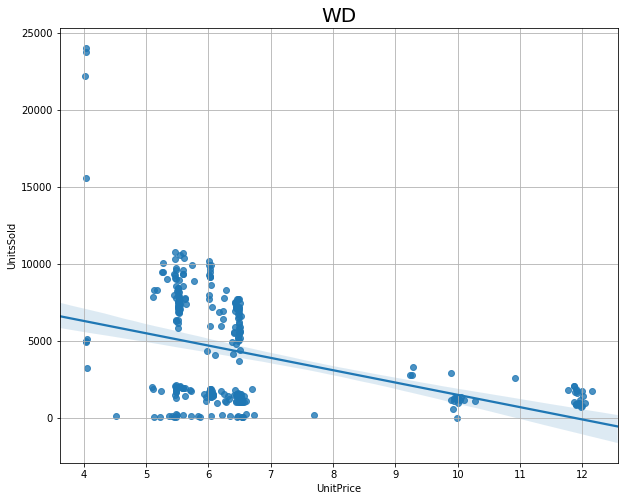

In [246]:
fig,ax=plt.subplots(figsize=(10,8))
plt.title('WD',fontsize=20)
plt.grid(True)
sns.regplot(x='UnitPrice',y='UnitsSold',data=cust2_WD, ax=ax)

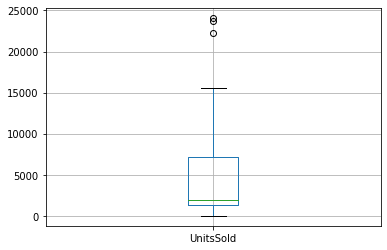

In [247]:
cust2_WD.boxplot('UnitsSold')

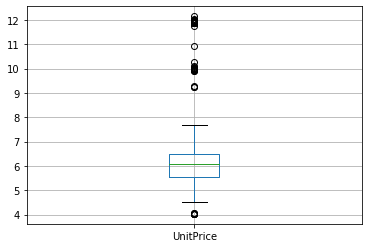

In [248]:
cust2_WD.boxplot('UnitPrice')

In [249]:
cust2_WD_RO=cust2_WD[(cust2_WD['UnitPrice']>4.5) & (cust2_WD['UnitPrice']<8) & (cust2_WD['UnitsSold']<17000)]

In [250]:
# Model for entire WD brand
cust2_WD_model=ols('UnitsSold~UnitPrice',data=cust2_WD_RO).fit()
print(cust2_WD_model.summary())

                            OLS Regression Results                            
Dep. Variable:              UnitsSold   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     22.98
Date:                Mon, 18 May 2020   Prob (F-statistic):           2.79e-06
Time:                        21:46:35   Log-Likelihood:                -2429.5
No. Observations:                 256   AIC:                             4863.
Df Residuals:                     254   BIC:                             4870.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.684e+04   2608.038      6.457      0.0

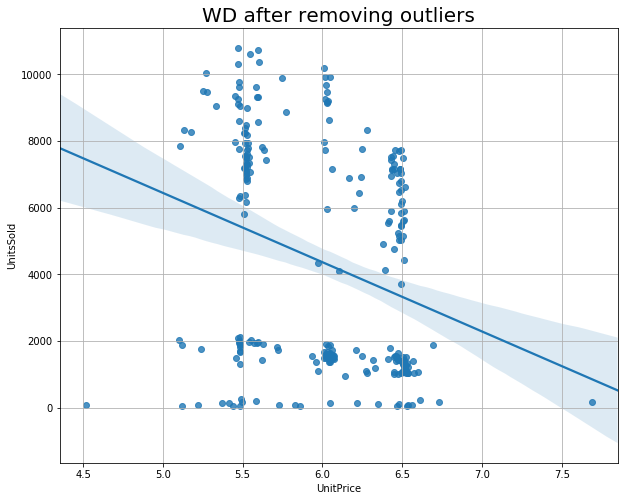

In [251]:
fig,ax=plt.subplots(figsize=(10,8))
plt.title('WD after removing outliers',fontsize=20)
plt.grid(True)
sns.regplot(x='UnitPrice',y='UnitsSold',data=cust2_WD_RO, ax=ax)

### Grouping Data and making unique entries for every day

In [252]:
cust2_WD.dtypes

EndDate      datetime64[ns]
PRODSTYLE            object
UnitsSold             int64
AmtSold             float64
UnitPrice           float64
dtype: object

In [253]:
cust2_WD=cust2_WD.drop(['UnitPrice'],axis=1)

In [254]:
cust2_WD_GB = cust2_WD.groupby("EndDate",as_index=False)[['UnitsSold','AmtSold']].agg({'UnitsSold':np.sum,'AmtSold':np.sum})

In [255]:
cust2_WD_GB.head()

,EndDate,UnitsSold,AmtSold
0,2015-03-06,18963,110877.0542
1,2015-03-13,21205,124676.6632
2,2015-03-20,20720,122225.9963
3,2015-03-27,19873,117168.7233
4,2015-04-03,21907,128540.9830


In [256]:
cust2_WD_GB['UnitPrice']=cust2_WD_GB['AmtSold']/cust2_WD_GB['UnitsSold']

In [257]:
# Model for entire WD after grouping on date level
cust2_WD_GB_model=ols('np.log(UnitsSold)~np.log(UnitPrice)',data=cust2_WD_GB).fit()
print(cust2_WD_GB_model.summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(UnitsSold)   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     91.22
Date:                Mon, 18 May 2020   Prob (F-statistic):           6.24e-14
Time:                        21:46:36   Log-Likelihood:                 52.339
No. Observations:                  66   AIC:                            -100.7
Df Residuals:                      64   BIC:                            -96.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            12.5594      0.28

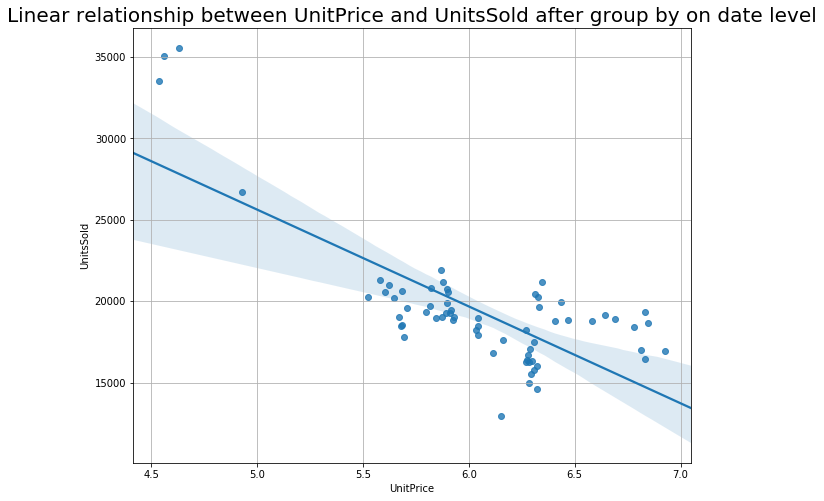

In [258]:
fig,ax=plt.subplots(figsize=(10,8))
plt.title('Linear relationship between UnitPrice and UnitsSold after group by on date level',fontsize=20)
plt.grid(True)
sns.regplot(x='UnitPrice',y='UnitsSold',data=cust2_WD_GB, ax=ax)

### Model for WD008

In [259]:
# Using the Entire data set for WD008 to create the model
WD008_model = ols('WD008UnitsSold~ WD008UnitPrice', data=cust2_WD008).fit()
print(WD008_model.summary())

                            OLS Regression Results                            
Dep. Variable:         WD008UnitsSold   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     33.00
Date:                Mon, 18 May 2020   Prob (F-statistic):           6.21e-08
Time:                        21:46:41   Log-Likelihood:                -1282.8
No. Observations:                 132   AIC:                             2570.
Df Residuals:                     130   BIC:                             2575.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.866e+04   4088.422      7.

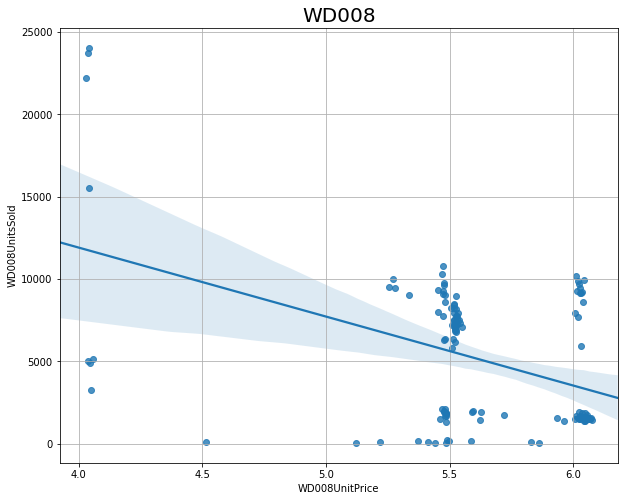

In [260]:
fig,ax=plt.subplots(figsize=(10,8))
plt.title('WD008',fontsize=20)
plt.grid(True)
sns.regplot(x='WD008UnitPrice',y='WD008UnitsSold',data=cust2_WD008, ax=ax)

In [261]:
cust2_WD008.shape

(132, 4)

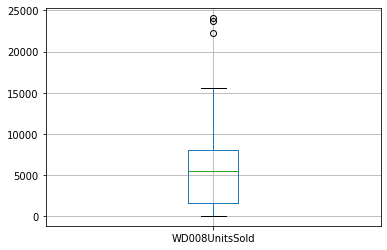

In [262]:
cust2_WD008.boxplot('WD008UnitsSold')

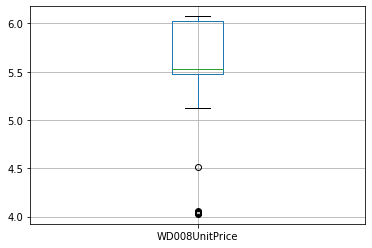

In [263]:
cust2_WD008.boxplot('WD008UnitPrice')

In [264]:
# Removing outliers and applying the same model
cust2_WD008_RO=cust2_WD008[(cust2_WD008['WD008UnitsSold']<16000) & (cust2_WD008['WD008UnitPrice']>4.6)]

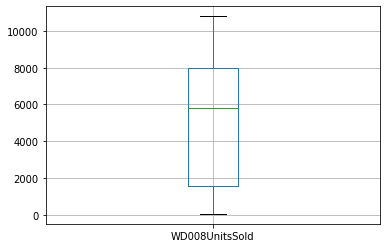

In [265]:
cust2_WD008_RO.boxplot('WD008UnitsSold')

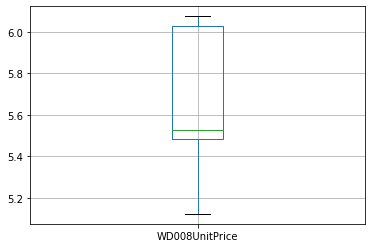

In [266]:
cust2_WD008_RO.boxplot('WD008UnitPrice')

In [267]:
# Using the Entire data set for WD008 post removing outliers
WD008_model = ols('np.log(WD008UnitsSold)~ np.log(WD008UnitPrice)', data=cust2_WD008_RO).fit()
print(WD008_model.summary())

                              OLS Regression Results                              
Dep. Variable:     np.log(WD008UnitsSold)   R-squared:                       0.004
Model:                                OLS   Adj. R-squared:                 -0.004
Method:                     Least Squares   F-statistic:                    0.5299
Date:                    Mon, 18 May 2020   Prob (F-statistic):              0.468
Time:                            21:46:44   Log-Likelihood:                -208.09
No. Observations:                     123   AIC:                             420.2
Df Residuals:                         121   BIC:                             425.8
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

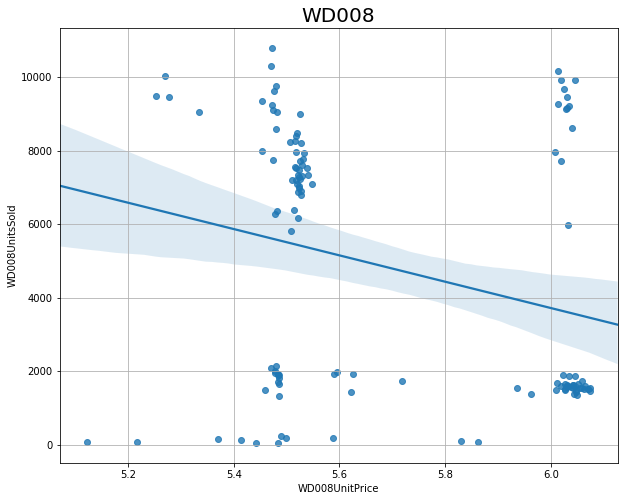

In [268]:
fig,ax=plt.subplots(figsize=(10,8))
plt.title('WD008',fontsize=20)
plt.grid(True)
sns.regplot(x='WD008UnitPrice',y='WD008UnitsSold',data=cust2_WD008_RO, ax=ax)

In [269]:
## Using aggregated data to create the same model

In [270]:
WD008_model = ols('np.log(WD008UnitsSold)~ np.log(WD008UnitPrice)', data=df_WD008_agg).fit()
print(WD008_model.summary())

                              OLS Regression Results                              
Dep. Variable:     np.log(WD008UnitsSold)   R-squared:                       0.132
Model:                                OLS   Adj. R-squared:                  0.117
Method:                     Least Squares   F-statistic:                     9.108
Date:                    Mon, 18 May 2020   Prob (F-statistic):            0.00373
Time:                            21:46:44   Log-Likelihood:                 45.121
No. Observations:                      62   AIC:                            -86.24
Df Residuals:                          60   BIC:                            -81.99
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

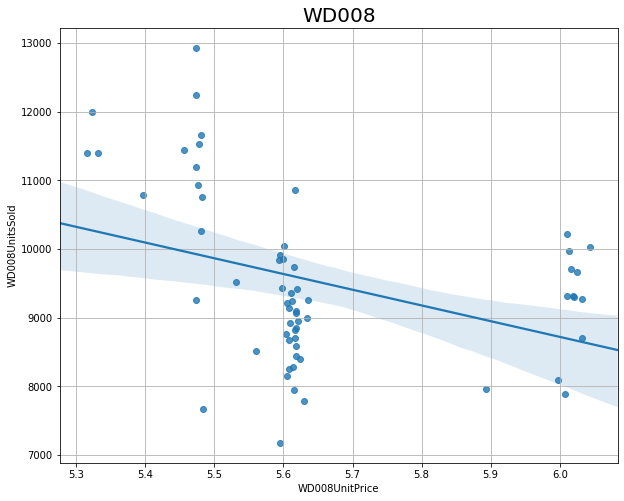

In [271]:
fig,ax=plt.subplots(figsize=(10,8))
plt.title('WD008',fontsize=20)
plt.grid(True)
sns.regplot(x='WD008UnitPrice',y='WD008UnitsSold',data=df_WD008_agg, ax=ax)

### Coefficient for WD008 is -1.3 || We will be take the mod value of it hence we will take 1.3

# -----------------------------------------------------------------------------------

### Model for WD012

In [272]:
#Applying model on the entire data set
# Using the Entire data set for WD012 to create the model
WD012_model = ols('np.log(WD012UnitsSold)~ np.log(WD012UnitPrice)', data=cust2_WD012).fit()
print(WD012_model.summary())

                              OLS Regression Results                              
Dep. Variable:     np.log(WD012UnitsSold)   R-squared:                       0.076
Model:                                OLS   Adj. R-squared:                  0.069
Method:                     Least Squares   F-statistic:                     10.73
Date:                    Mon, 18 May 2020   Prob (F-statistic):            0.00135
Time:                            21:46:45   Log-Likelihood:                -213.90
No. Observations:                     132   AIC:                             431.8
Df Residuals:                         130   BIC:                             437.6
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

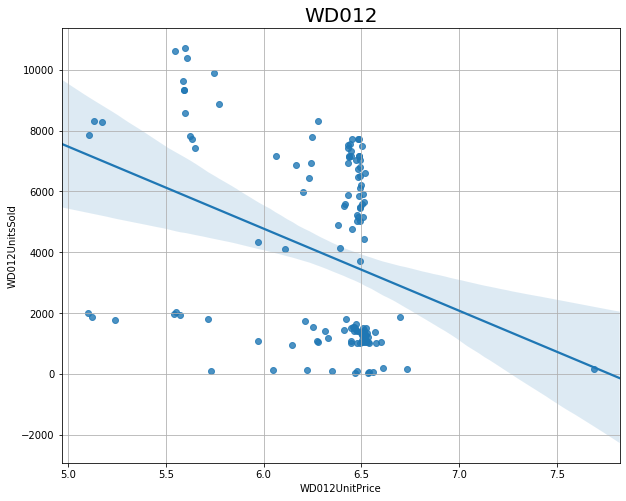

In [273]:
fig,ax=plt.subplots(figsize=(10,8))
plt.title('WD012',fontsize=20)
plt.grid(True)
sns.regplot(x='WD012UnitPrice',y='WD012UnitsSold',data=cust2_WD012, ax=ax)

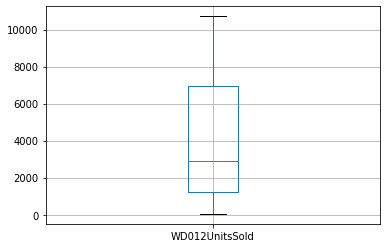

In [274]:
cust2_WD012.boxplot('WD012UnitsSold')

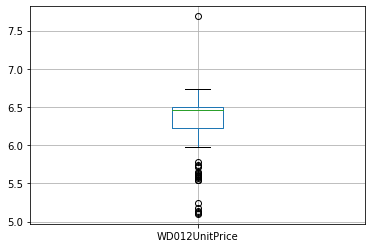

In [275]:
cust2_WD012.boxplot('WD012UnitPrice')

In [276]:
cust2_WD012_RO=cust2_WD012[(cust2_WD012['WD012UnitPrice']>5.9) & (cust2_WD012['WD012UnitPrice']<7)]

#### Applying model after removing outliers

In [277]:
#Applying model on the entire data set
# Using the Entire data set for WD012 to create the model
WD012_model = ols('np.log(WD012UnitsSold)~ np.log(WD012UnitPrice)', data=cust2_WD012_RO).fit()
print(WD012_model.summary())

                              OLS Regression Results                              
Dep. Variable:     np.log(WD012UnitsSold)   R-squared:                       0.011
Model:                                OLS   Adj. R-squared:                  0.001
Method:                     Least Squares   F-statistic:                     1.142
Date:                    Mon, 18 May 2020   Prob (F-statistic):              0.288
Time:                            21:46:47   Log-Likelihood:                -176.48
No. Observations:                     108   AIC:                             357.0
Df Residuals:                         106   BIC:                             362.3
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

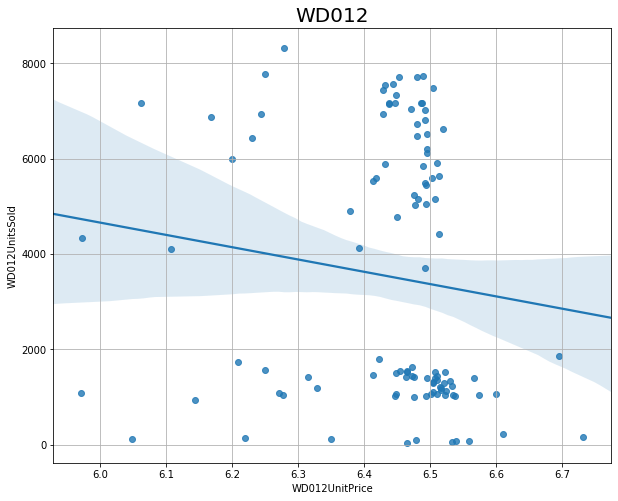

In [278]:
fig,ax=plt.subplots(figsize=(10,8))
plt.title('WD012',fontsize=20)
plt.grid(True)
sns.regplot(x='WD012UnitPrice',y='WD012UnitsSold',data=cust2_WD012_RO, ax=ax)

In [279]:
WD012_model = ols('np.log(WD012UnitsSold)~ np.log(WD012UnitPrice)', data=df_WD012_agg).fit()
print(WD012_model.summary())

                              OLS Regression Results                              
Dep. Variable:     np.log(WD012UnitsSold)   R-squared:                       0.004
Model:                                OLS   Adj. R-squared:                 -0.014
Method:                     Least Squares   F-statistic:                    0.2055
Date:                    Mon, 18 May 2020   Prob (F-statistic):              0.652
Time:                            21:46:47   Log-Likelihood:                -85.318
No. Observations:                      58   AIC:                             174.6
Df Residuals:                          56   BIC:                             178.8
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

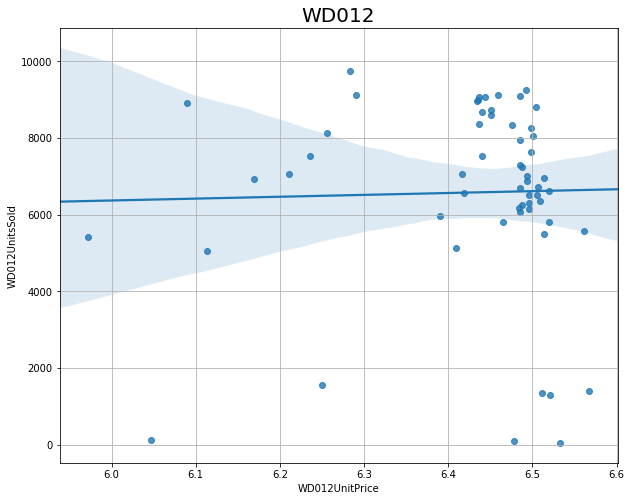

In [280]:
fig,ax=plt.subplots(figsize=(10,8))
plt.title('WD012',fontsize=20)
plt.grid(True)
sns.regplot(x='WD012UnitPrice',y='WD012UnitsSold',data=df_WD012_agg, ax=ax)

### The coeeficient for WD012 is 3.04

### WD017

In [281]:
#Applying model on the entire data set
# Using the Entire data set for WD017 to create the model
WD017_model = ols('np.log(WD017UnitsSold)~ np.log(WD017UnitPrice)', data=cust2_WD017).fit()
print(WD017_model.summary())

                              OLS Regression Results                              
Dep. Variable:     np.log(WD017UnitsSold)   R-squared:                       0.002
Model:                                OLS   Adj. R-squared:                 -0.024
Method:                     Least Squares   F-statistic:                   0.07726
Date:                    Mon, 18 May 2020   Prob (F-statistic):              0.783
Time:                            21:46:48   Log-Likelihood:                -64.963
No. Observations:                      41   AIC:                             133.9
Df Residuals:                          39   BIC:                             137.4
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

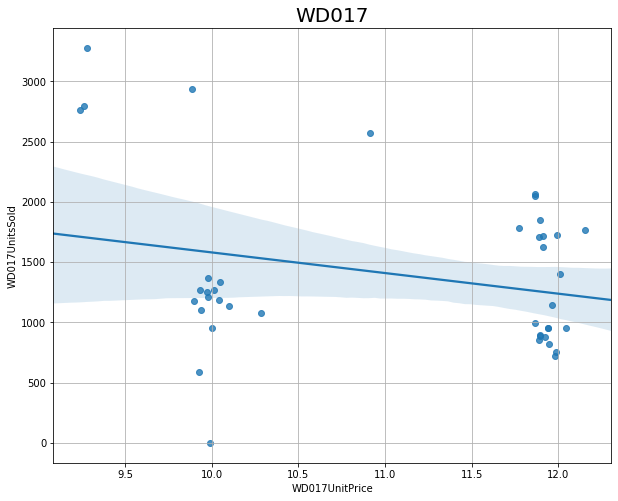

In [282]:
fig,ax=plt.subplots(figsize=(10,8))
plt.title('WD017',fontsize=20)
plt.grid(True)
sns.regplot(x='WD017UnitPrice',y='WD017UnitsSold',data=cust2_WD017, ax=ax)

#### Removing the putliers and applying the same model again

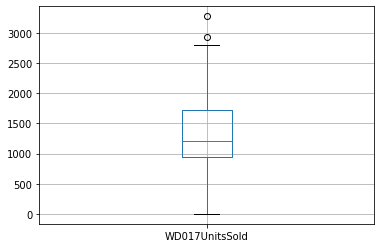

In [283]:
cust2_WD017.boxplot('WD017UnitsSold')

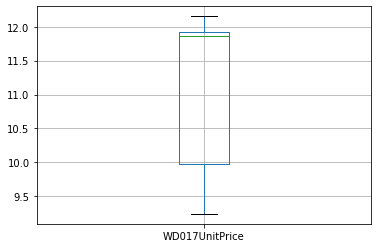

In [284]:
cust2_WD017.boxplot('WD017UnitPrice')

In [285]:
cust2_WD017_RO=cust2_WD017[cust2_WD017["WD017UnitsSold"]<2850]

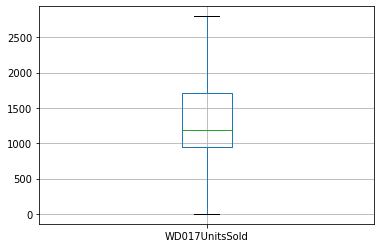

In [286]:
cust2_WD017_RO.boxplot('WD017UnitsSold')

In [287]:
#Applying model after removing outliers
# Using the Entire data set for WD017 to create the model
WD017_model = ols('np.log(WD017UnitsSold)~ np.log(WD017UnitPrice)', data=cust2_WD017_RO).fit()
print(WD017_model.summary())

                              OLS Regression Results                              
Dep. Variable:     np.log(WD017UnitsSold)   R-squared:                       0.014
Model:                                OLS   Adj. R-squared:                 -0.013
Method:                     Least Squares   F-statistic:                    0.5120
Date:                    Mon, 18 May 2020   Prob (F-statistic):              0.479
Time:                            21:46:49   Log-Likelihood:                -61.763
No. Observations:                      39   AIC:                             127.5
Df Residuals:                          37   BIC:                             130.9
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

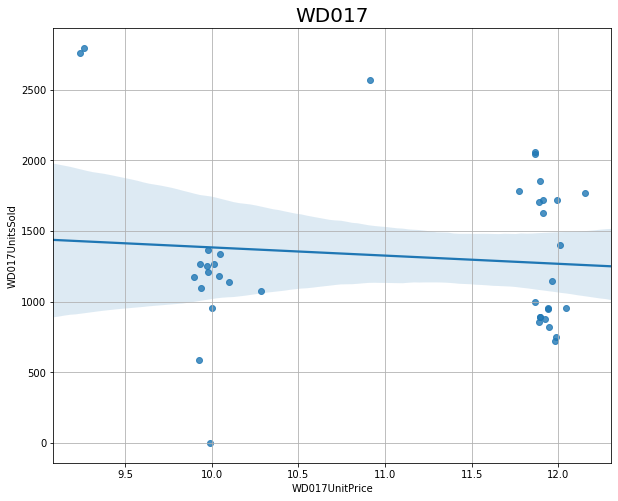

In [288]:
fig,ax=plt.subplots(figsize=(10,8))
plt.title('WD017',fontsize=20)
plt.grid(True)
sns.regplot(x='WD017UnitPrice',y='WD017UnitsSold',data=cust2_WD017_RO, ax=ax)

In [289]:
#Applying model on the aggregated data
WD017_model = ols('np.log(WD017UnitsSold)~ np.log(WD017UnitPrice)', data=df_WD017_agg).fit()
print(WD017_model.summary())

                              OLS Regression Results                              
Dep. Variable:     np.log(WD017UnitsSold)   R-squared:                       0.002
Model:                                OLS   Adj. R-squared:                 -0.024
Method:                     Least Squares   F-statistic:                   0.07726
Date:                    Mon, 18 May 2020   Prob (F-statistic):              0.783
Time:                            21:46:49   Log-Likelihood:                -64.963
No. Observations:                      41   AIC:                             133.9
Df Residuals:                          39   BIC:                             137.4
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

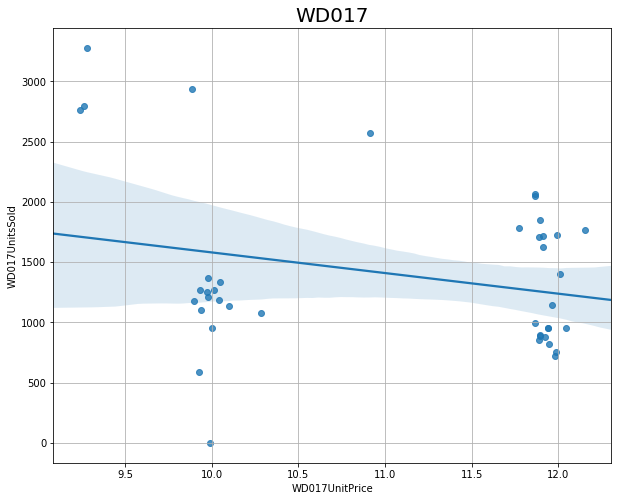

In [290]:
fig,ax=plt.subplots(figsize=(10,8))
plt.title('WD017',fontsize=20)
plt.grid(True)
sns.regplot(x='WD017UnitPrice',y='WD017UnitsSold',data=df_WD017_agg, ax=ax)

### Coefficient for WD017 is 0.55

### ------------------------------------------------------------------------------

## Adding prices of other products as features to build a predictive model for WD brand of products

### Wd008

In [291]:
WD8_WD12=pd.merge(df_WD008_agg, df_WD012_agg, on='EndDate',how='outer')

WD8_WD12_17=pd.merge(WD8_WD12, df_WD017_agg, on='EndDate',how='outer')

WD8_WD12_17_SPC10=pd.merge(WD8_WD12_17, df_SPC10_agg, on='EndDate',how='outer')

WD8_WD12_17_SPC10_11=pd.merge(WD8_WD12_17_SPC10, df_SPC11_agg, on='EndDate',how='outer')

WD8_WD9_12_17_SPC10_11_65=pd.merge(WD8_WD12_17_SPC10_11, df_SPC65_agg, on='EndDate',how='outer')

In [292]:
WD8_WD9_12_17_SPC10_11_65.head()

,WD008UnitsSold,WD008AmtSold,WD008UnitPrice,WD012UnitsSold,WD012AmtSold,WD012UnitPrice,WD017UnitsSold,WD017AmtSold,WD017UnitPrice,SPC10UnitsSold,SPC10AmtSold,SPC10UnitPrice,SPC11UnitsSold,SPC11AmtSold,SPC11UnitPrice,SPC65UnitsSold,SPC65AmtSold,SPC65UnitPrice
EndDate,,,,,,,,,,,,,,,,,,
2015-03-06,11435.0,62391.7158,5.456206,7528.0,48485.3384,6.440667,NaN,NaN,NaN,2101.0,14652.9762,6.974287,2939,20827.2572,7.086511,19.0,264.4097,13.9163
2015-03-13,12236.0,66964.7838,5.472768,8969.0,57711.8794,6.434595,NaN,NaN,NaN,NaN,NaN,NaN,4795,30516.6120,6.364257,3.0,41.9700,13.9900
2015-03-20,11654.0,63866.5295,5.480224,9066.0,58359.4668,6.437179,NaN,NaN,NaN,NaN,NaN,NaN,5687,34686.1228,6.099195,NaN,NaN,NaN
2015-03-27,11195.0,61280.5007,5.473917,8678.0,55888.2226,6.440219,NaN,NaN,NaN,NaN,NaN,NaN,5155,31304.5711,6.072662,1.0,2.0000,2.0000
2015-04-03,12925.0,70740.0076,5.473115,8982.0,57800.9754,6.435201,NaN,NaN,NaN,NaN,NaN,NaN,5543,33593.6884,6.060561,NaN,NaN,NaN


In [293]:
WD8_WD9_12_17_SPC10_11_65.isnull().sum()

WD008UnitsSold     4
WD008AmtSold       4
WD008UnitPrice     4
WD012UnitsSold     8
WD012AmtSold       8
WD012UnitPrice     8
WD017UnitsSold    25
WD017AmtSold      25
WD017UnitPrice    25
SPC10UnitsSold    14
SPC10AmtSold      14
SPC10UnitPrice    14
SPC11UnitsSold     0
SPC11AmtSold       0
SPC11UnitPrice     0
SPC65UnitsSold    58
SPC65AmtSold      58
SPC65UnitPrice    58
dtype: int64

In [294]:
WD8_WD9_12_17_SPC10_11_65.columns

Index(['WD008UnitsSold', 'WD008AmtSold', 'WD008UnitPrice', 'WD012UnitsSold',
       'WD012AmtSold', 'WD012UnitPrice', 'WD017UnitsSold', 'WD017AmtSold',
       'WD017UnitPrice', 'SPC10UnitsSold', 'SPC10AmtSold', 'SPC10UnitPrice',
       'SPC11UnitsSold', 'SPC11AmtSold', 'SPC11UnitPrice', 'SPC65UnitsSold',
       'SPC65AmtSold', 'SPC65UnitPrice'],
      dtype='object')

In [295]:
WD8_WD9_12_17_SPC10_11_65.drop(['WD008AmtSold','WD012AmtSold','WD017AmtSold','SPC10AmtSold','SPC11AmtSold','SPC65AmtSold'],axis=1,inplace=True)

In [296]:
WD8_WD9_12_17_SPC10_11_65['WD012UnitsSold'].fillna(value=WD8_WD9_12_17_SPC10_11_65['WD012UnitsSold'].median(), inplace=True)
WD8_WD9_12_17_SPC10_11_65['WD012UnitPrice'].fillna(value=WD8_WD9_12_17_SPC10_11_65['WD012UnitPrice'].median(), inplace=True)
WD8_WD9_12_17_SPC10_11_65['WD017UnitsSold'].fillna(value=WD8_WD9_12_17_SPC10_11_65['WD017UnitsSold'].median(), inplace=True)

WD8_WD9_12_17_SPC10_11_65['WD017UnitPrice'].fillna(value=WD8_WD9_12_17_SPC10_11_65['WD017UnitPrice'].median(), inplace=True)
WD8_WD9_12_17_SPC10_11_65['SPC10UnitsSold'].fillna(value=WD8_WD9_12_17_SPC10_11_65['SPC10UnitsSold'].median(), inplace=True)
WD8_WD9_12_17_SPC10_11_65['SPC10UnitPrice'].fillna(value=WD8_WD9_12_17_SPC10_11_65['SPC10UnitPrice'].median(), inplace=True)

WD8_WD9_12_17_SPC10_11_65['SPC65UnitsSold'].fillna(value=WD8_WD9_12_17_SPC10_11_65['SPC65UnitsSold'].median(), inplace=True)
WD8_WD9_12_17_SPC10_11_65['SPC65UnitPrice'].fillna(value=WD8_WD9_12_17_SPC10_11_65['SPC65UnitPrice'].median(), inplace=True)




WD8_WD9_12_17_SPC10_11_65.isnull().sum()

WD008UnitsSold    4
WD008UnitPrice    4
WD012UnitsSold    0
WD012UnitPrice    0
WD017UnitsSold    0
WD017UnitPrice    0
SPC10UnitsSold    0
SPC10UnitPrice    0
SPC11UnitsSold    0
SPC11UnitPrice    0
SPC65UnitsSold    0
SPC65UnitPrice    0
dtype: int64

In [297]:
WD8_WD9_12_17_SPC10_11_65.dropna(inplace=True)

In [298]:
X_WD8_opt=WD8_WD9_12_17_SPC10_11_65.drop(['WD008UnitsSold','WD012UnitsSold','WD012UnitPrice','WD017UnitsSold','SPC10UnitsSold','SPC10UnitPrice','SPC11UnitsSold','SPC11UnitPrice','SPC65UnitsSold','SPC65UnitPrice'],axis=1)
y_WD8=WD8_WD9_12_17_SPC10_11_65['WD008UnitsSold']

In [299]:
X_WD8_opt.head()

,WD008UnitPrice,WD017UnitPrice
EndDate,,
2015-03-06,5.456206,11.865035
2015-03-13,5.472768,11.865035
2015-03-20,5.480224,11.865035
2015-03-27,5.473917,11.865035
2015-04-03,5.473115,11.865035


In [300]:
WD008_model_opt = ols('np.log(y_WD8)~ np.log(X_WD8_opt)', data=WD8_WD9_12_17_SPC10_11_65).fit()
print(WD008_model_opt.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(y_WD8)   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     7.026
Date:                Mon, 18 May 2020   Prob (F-statistic):            0.00183
Time:                        21:46:50   Log-Likelihood:                 47.362
No. Observations:                  62   AIC:                            -88.72
Df Residuals:                      59   BIC:                            -82.34
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.1728 

### WD012

In [301]:
WD8_WD9_12_17_SPC10_11_65.isnull().sum()

WD008UnitsSold    0
WD008UnitPrice    0
WD012UnitsSold    0
WD012UnitPrice    0
WD017UnitsSold    0
WD017UnitPrice    0
SPC10UnitsSold    0
SPC10UnitPrice    0
SPC11UnitsSold    0
SPC11UnitPrice    0
SPC65UnitsSold    0
SPC65UnitPrice    0
dtype: int64

In [302]:
X_WD12_opt=WD8_WD9_12_17_SPC10_11_65.drop(['WD008UnitsSold','WD012UnitsSold','WD012UnitPrice','WD017UnitsSold','SPC10UnitsSold','SPC10UnitPrice','SPC11UnitsSold','SPC65UnitsSold','SPC65UnitPrice'],axis=1)
y_WD12=WD8_WD9_12_17_SPC10_11_65['WD012UnitsSold']

In [303]:
X_WD12_opt.head()

,WD008UnitPrice,WD017UnitPrice,SPC11UnitPrice
EndDate,,,
2015-03-06,5.456206,11.865035,7.086511
2015-03-13,5.472768,11.865035,6.364257
2015-03-20,5.480224,11.865035,6.099195
2015-03-27,5.473917,11.865035,6.072662
2015-04-03,5.473115,11.865035,6.060561


In [304]:
WD012_model_opt = ols('np.log(y_WD12)~ np.log(X_WD12_opt)', data=WD8_WD9_12_17_SPC10_11_65).fit()
print(WD012_model_opt.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(y_WD12)   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     8.234
Date:                Mon, 18 May 2020   Prob (F-statistic):           0.000119
Time:                        21:46:50   Log-Likelihood:                -78.501
No. Observations:                  62   AIC:                             165.0
Df Residuals:                      58   BIC:                             173.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                54.62

### WD017

In [305]:
WD8_WD9_12_17_SPC10_11_65.isnull().sum()

WD008UnitsSold    0
WD008UnitPrice    0
WD012UnitsSold    0
WD012UnitPrice    0
WD017UnitsSold    0
WD017UnitPrice    0
SPC10UnitsSold    0
SPC10UnitPrice    0
SPC11UnitsSold    0
SPC11UnitPrice    0
SPC65UnitsSold    0
SPC65UnitPrice    0
dtype: int64

In [306]:
X_WD17_opt=WD8_WD9_12_17_SPC10_11_65.drop(['WD008UnitsSold','WD012UnitsSold','WD017UnitsSold','WD017UnitPrice','SPC10UnitsSold','SPC10UnitPrice','SPC11UnitsSold','SPC11UnitPrice','SPC65UnitsSold','SPC65UnitPrice'],axis=1)
y_WD17=WD8_WD9_12_17_SPC10_11_65['WD017UnitsSold']

In [307]:
X_WD17_opt.head()

,WD008UnitPrice,WD012UnitPrice
EndDate,,
2015-03-06,5.456206,6.440667
2015-03-13,5.472768,6.434595
2015-03-20,5.480224,6.437179
2015-03-27,5.473917,6.440219
2015-04-03,5.473115,6.435201


In [308]:
WD017_model_opt = ols('np.log(y_WD17)~ np.log(X_WD17_opt)', data=WD8_WD9_12_17_SPC10_11_65).fit()
print(WD017_model_opt.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(y_WD17)   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     5.013
Date:                Mon, 18 May 2020   Prob (F-statistic):            0.00976
Time:                        21:46:51   Log-Likelihood:                -80.435
No. Observations:                  62   AIC:                             166.9
Df Residuals:                      59   BIC:                             173.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -30.57

# Total Revenue for Customer 2

In [309]:
TotalRevenue=cust2_WD['AmtSold'].sum()

In [310]:
TotalRevenue

7648226.7798999995

In [311]:
w_WD008=cust2_WD008['WD008AmtSold'].sum()/TotalRevenue
w_WD008=round(w_WD008,3)
w_WD008

0.49

In [312]:
w_WD012=cust2_WD012['WD012AmtSold'].sum()/TotalRevenue
w_WD012=round(w_WD012,3)
w_WD012

0.428

In [313]:
w_WD017=cust2_WD017['WD017AmtSold'].sum()/TotalRevenue
w_WD017=round(w_WD017,3)
w_WD017

0.082

In [314]:
wt_WD_cust2=[w_WD008,w_WD012,w_WD017]
wt_WD_cust2

[0.49, 0.428, 0.082]

In [315]:
#Coeffocients for Customer 2
#Coefficient for WD008 1.3
#Coefficient for WD012 3.04
#Coefficient for WD017 is 0.55
CF_cust2=[1.3,3.04,0.55]
CF_cust2

[1.3, 3.04, 0.55]

In [316]:
weighted_elasticity=[]
for num1,num2 in zip(wt_WD_cust2,CF_cust2):
    weighted_elasticity.append(num1*num2)
print(weighted_elasticity)    

[0.637, 1.30112, 0.04510000000000001]


In [317]:
total_elasticity=np.sum(weighted_elasticity)
total_elasticity

1.98322

### Total Elasticity of WD product for Customer 2 is 1.983